## Kaggle reference: https://www.kaggle.com/code/neginmoghadasi/notebook4ed0f823a2/edit

In [1]:
# Install debugging:
# pip install icecream 

from icecream import ic

#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from PIL import Image, ImageDraw
import pyautogui
from PIL import Image

import shap  # package used to calculate Shap values



# from sklearn.metrics import plot_confusion_matrix


# 3 classifications (without age):

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited3classes.xlsx")
print(df)

     gender        age  Gewicht  Height  HR       BSA        BMI   LV_EDV  \
0         1  64.000000    108.0     192  87  2.400000  29.400000  238.242   
1         1  67.000000    103.0     175  57  2.200000  33.600000  262.539   
2         0  56.000000     56.0     164  75  1.600000  20.800000   95.021   
3         0  29.000000     65.0     165  68  1.700000  23.900000  320.154   
4         1  82.000000     80.0     174  70  1.900000  26.400000  311.236   
..      ...        ...      ...     ...  ..       ...        ...      ...   
102       0  62.893151     58.0     156  74  1.569779  23.833005   86.800   
103       0  54.230137     67.0     165  55  1.738297  24.609734  128.600   
104       1  66.230137     83.0     176  63  1.995130  26.794938  165.200   
105       1  52.545205     75.0     178  76  1.926734  23.671254  125.300   
106       1  53.358904     82.0     178  53  2.001206  25.880571  144.900   

      LV_ESV    LV_SV  ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  \


In [3]:
df.head(10)

gender   age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1  64.0    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1  67.0    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0  56.0     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0  29.0     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1  82.0     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1  61.0     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1  34.0    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0  69.0     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0  64.0     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0  25.0     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['gender', 'age', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  LV_radial_SAX_S  \
0  238.242  181.514   56.728  23.811     101.864      77.609            18.41   
1  262.539  181.558   80.981  30.845     118.614      82.027             9.31   
2   95.021   46.162   48.860  51.420      59.253      28.785            22.81   
3  320.154   67.640  252.514  78.873     186.564      39.416            32.98   
4  311.236  129.252  181.984  58.471     159.776      66.353            13.19   
5  157.995   87.447   70.548  44.652      73.060      40.437            23.17   
6  176.864  107.140   69.724  39.422      78.948      47.825            15.59   
7  130.226   46.267   83.959  64.472      83.430      29.641            25.78   
8  164.636   88.562   76.074  46.207      88.223      47.458            17.70   
9  151.861   62.639   89.221  58.752      78.868      32.531            23.92   

   LV_circumf_SAX_S  LV_syst_radial_SAX_SR  LV_syst_circumf_SAX_SR  ...  \
0             -9.11                   0.58                   -0.79  ...   
1             -7.14                   0.54                   -0.49  ...   
2            -15.05                   1.14                   -0.72  ...   
3            -18.86                   1.78                   -1.17  ...   
4             -9.41                   0.59                   -0.41  ...   
5            -15.37                   1.19                   -0.82  ...   
6            -11.24                   0.90                   -0.71  ...   
7            -16.03                   0.97                   -0.68  ...   
8            -12.49                   0.71                   -0.50  ...   
9            -15.54                   1.30                   -0.95  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63        

In [5]:
features = ['LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [6]:
# #heatmap on base data
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [7]:
# #Let's see if we have any outliers in the base data
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 6))
# index = 0
# axs = axs.flatten()
# for col_name, series_value in df.items():
#     sns.boxplot(y=col_name, data=df, ax=axs[index])
#     index += 1
# plt.tight_layout()

In [8]:
#counting the outliers
for col_name, series_value in df.items():
    q1 = series_value.quantile(0.25)
    q3 = series_value.quantile(0.75)
    inter_quartile_range = q3 - q1
    outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
    percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
    print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

Outliers in column LV_EDV = 4.67%
Outliers in column LV_ESV = 7.48%
Outliers in column LV_SV = 2.80%
Outliers in column LV_EF = 9.35%
Outliers in column LV_EDV/BSA = 7.48%
Outliers in column LV_ESV/BSA = 8.41%
Outliers in column LV_radial_SAX_S = 4.67%
Outliers in column LV_circumf_SAX_S = 3.74%
Outliers in column LV_syst_radial_SAX_SR = 5.61%
Outliers in column LV_syst_circumf_SAX_SR = 3.74%
Outliers in column LV_diast_radial_SAX_SR = 0.00%
Outliers in column LV_diast_circumf_SAX_SR = 0.00%
Outliers in column LV_radial_LAX_S = 9.35%
Outliers in column LV_time_to_peak_long_LAX = 2.80%
Outliers in column LV_syst_radial_LAX_SR = 5.61%
Outliers in column LV_syst_long_LAX_SR = 4.67%
Outliers in column LV_diast_radial_LAX_SR = 0.93%
Outliers in column LV_diast_long_LAX_SR = 0.93%
Outliers in column RV_EDV = 0.93%
Outliers in column RV_ESV = 6.54%
Outliers in column RV_SV = 3.74%
Outliers in column RV_EF = 6.54%
Outliers in column RV_EDV/BSA = 4.67%
Outliers in column RV_ESV/BSA = 8.41%
Outl

In [9]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)
df_norm

array([[ 1.80413317,  2.98565448, -1.00177764, ..., -2.79463135,
         1.95355283,  1.72306393],
       [ 2.30417054,  2.98676665, -0.20523966, ..., -2.3337273 ,
         1.89704292,  1.72306393],
       [-1.14338513, -0.43556625, -1.2601853 , ..., -0.88356578,
        -0.04124695,  0.33683957],
       ...,
       [ 0.30091345, -0.04787576,  0.54091737, ...,  0.79142699,
        -0.38030641, -1.0493848 ],
       [-0.52023694, -0.39669104, -0.31628138, ...,  0.83639324,
         0.14523575, -1.0493848 ],
       [-0.11686482, -0.27030869,  0.16322443, ...,  0.79142699,
        -0.38030641, -1.0493848 ]])

In [10]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [11]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :36].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 36].values

In [12]:
X.shape

(107, 36)

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X

array([[238.242, 181.514,  56.728, ...,  -0.87 ,  -1.02 ,   0.69 ],
       [262.539, 181.558,  80.981, ...,   0.62 ,  -0.61 ,   0.59 ],
       [ 95.021,  46.162,  48.86 , ...,   2.97 ,   0.68 ,  -2.84 ],
       ...,
       [165.2  ,  61.5  , 103.7  , ...,   2.05 ,   2.17 ,  -3.44 ],
       [125.3  ,  47.7  ,  77.6  , ...,   2.72 ,   2.21 ,  -2.51 ],
       [144.9  ,  52.7  ,  92.2  , ...,   2.05 ,   2.17 ,  -3.44 ]])

In [15]:
y

array([2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 36), (74,))  
Test: ((33, 36), (33,))


In [17]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-1.12142601, -0.39854187, -1.20193532, ...,  0.10189828,
         1.42382968, -1.05091934],
       [-0.33813305, -0.53783658,  0.19455302, ..., -0.58675578,
        -0.20066568,  0.76227931],
       [ 0.18185501,  0.03023419,  0.23849143, ..., -0.38421047,
         0.66878254, -0.15898991],
       ...,
       [-0.44781804, -0.74910256,  0.30753751, ..., -0.15851712,
        -0.15490525,  0.22242728],
       [-0.78662276, -0.46490286, -0.59593043, ...,  0.76161729,
         0.97766546, -0.95116408],
       [-1.3293603 , -1.00262175, -0.71559984, ...,  0.08453725,
         0.26837875, -0.09444239]])

In [19]:
X_test

array([[-0.64484476, -0.86177776,  0.15375306, ..., -0.07171199,
        -0.55530904, -0.34676453],
       [-0.77079969, -0.11659567, -1.03713488, ...,  3.21530908,
        -0.15490525, -1.03331547],
       [ 3.22939131,  1.48919016,  2.99669399, ..., -0.96291136,
        -0.90995239,  1.17303628],
       ...,
       [-1.30701706, -0.93924195, -0.76581517, ...,  0.29865658,
         0.62302211, -0.26461313],
       [-0.92921324, -0.86647256, -0.27935416, ...,  0.40282274,
         1.06918633, -0.35263248],
       [-0.00783907, -0.07448332,  0.08536606, ..., -0.3379144 ,
        -0.97859304,  0.31631459]])

In [20]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [21]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [22]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [23]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    1              0              0              0   
1         1           1    1              1              1              1   
2         2           2    2              2              2              1   
3         0           0    0              0              0              0   
4         0           0    0              0              0              0   
5         0           0    0              0              0              0   
6         1           1    1              1              1              1   
7         1           1    1              1              1              1   
8         0           0    0              2              1              0   
9         1           1    1              1              1              1   
10        0           0    0              0              0              0   
11        2           1    0              1              0              1   
12        2           1    1              2              2              1   
13        0           1    1              0              0              0   
14        2           1    1              1              1              1   
15        0           0    0              0              0              0   
16        1           0    1              0              0              1   
17        0           0    0              0              0              0   
18        0           0    1              1              0              0   
19        2           1    1              0              1              1   
20        1           1    1              1              1              1   
21        2           1    1              2              1              1   
22        0           0    0              0              0              0   
23        1           1    1              1              1              1   
24        1           1    1              0              1              1   
25        1           2    1              0              1              1   
26        2           1    1              2              1              1   
27        0           0    0              0              0              0   
28        1           1    1              1              1              1   
29        1           1    1              1              1              1   
30        0           0    0              0              0              0   
31        0           1    1              0              0              1   
32        1           1    1              1              1              1   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   1            1       1  
2                   2            2       2  
3                   0            0       0  
4                   0            0       0  
5                   0            0       0  
6                   1            1       1  
7                   1            1       1  
8                   0            1       0  
9                   1            1       1  
10                  0            0       0  
11                  1            1       1  
12                  2            1       1  
13                  0            0       0  
14                  1            1       1  
15                  0            0       0  
16                  0            0       0  
17                  0            0       0  
18                  1            0       0  
19                  1            1       1  
20                  1            1       1  
21                  2            2       1  
22                  0            0       0  
23                  1            1       1  
24                  0            1       1  
25                  0            1       0  
26                  1            1       1  
27                  0            0       0  
28                  1            1       1  
29                  1            1 

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.56      0.83      0.67        12
           2       0.50      0.14      0.22         7

    accuracy                           0.70        33
   macro avg       0.66      0.61      0.59        33
weighted avg       0.70      0.70      0.67        33

KNN
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.57      1.00      0.73        12
           2       1.00      0.14      0.25         7

    accuracy                           0.70        33
   macro avg       0.83      0.62      0.59        33
weighted avg       0.81      0.70      0.66        33

Decision Tree
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.75      0.75      0.75        12
           2       0.80      0.57    

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/negin/opt/an

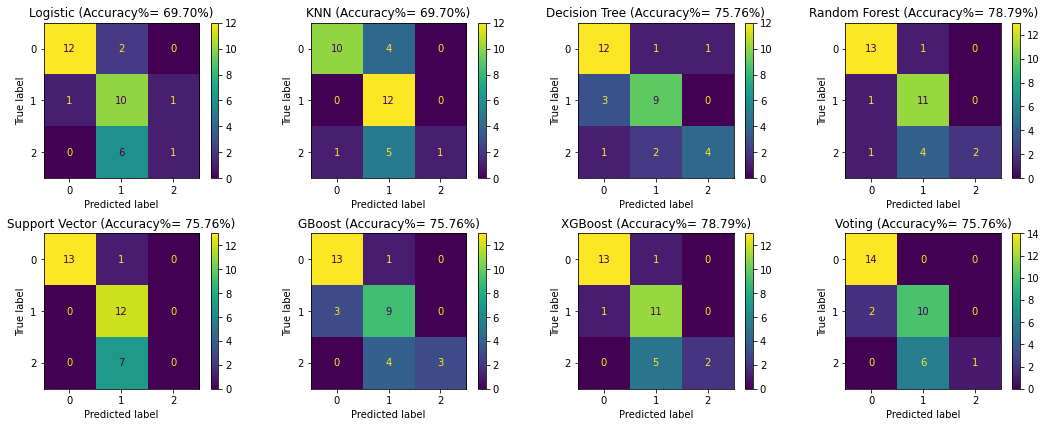

In [24]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

# 3 classifications (with age):

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited3classes.xlsx")
print(df)

     gender        age  Gewicht  Height  HR       BSA        BMI   LV_EDV  \
0         1  64.000000    108.0     192  87  2.400000  29.400000  238.242   
1         1  67.000000    103.0     175  57  2.200000  33.600000  262.539   
2         0  56.000000     56.0     164  75  1.600000  20.800000   95.021   
3         0  29.000000     65.0     165  68  1.700000  23.900000  320.154   
4         1  82.000000     80.0     174  70  1.900000  26.400000  311.236   
..      ...        ...      ...     ...  ..       ...        ...      ...   
102       0  62.893151     58.0     156  74  1.569779  23.833005   86.800   
103       0  54.230137     67.0     165  55  1.738297  24.609734  128.600   
104       1  66.230137     83.0     176  63  1.995130  26.794938  165.200   
105       1  52.545205     75.0     178  76  1.926734  23.671254  125.300   
106       1  53.358904     82.0     178  53  2.001206  25.880571  144.900   

      LV_ESV    LV_SV  ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  \


In [3]:
df.head(10)

gender   age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1  64.0    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1  67.0    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0  56.0     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0  29.0     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1  82.0     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1  61.0     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1  34.0    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0  69.0     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0  64.0     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0  25.0     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0  64.0  238.242  181.514   56.728  23.811     101.864      77.609   
1  67.0  262.539  181.558   80.981  30.845     118.614      82.027   
2  56.0   95.021   46.162   48.860  51.420      59.253      28.785   
3  29.0  320.154   67.640  252.514  78.873     186.564      39.416   
4  82.0  311.236  129.252  181.984  58.471     159.776      66.353   
5  61.0  157.995   87.447   70.548  44.652      73.060      40.437   
6  34.0  176.864  107.140   69.724  39.422      78.948      47.825   
7  69.0  130.226   46.267   83.959  64.472      83.430      29.641   
8  64.0  164.636   88.562   76.074  46.207      88.223      47.458   
9  25.0  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 38 col

In [5]:
features = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['age',
 'LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [6]:
# #heatmap on base data
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [7]:
# #Let's see if we have any outliers in the base data
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 6))
# index = 0
# axs = axs.flatten()
# for col_name, series_value in df.items():
#     sns.boxplot(y=col_name, data=df, ax=axs[index])
#     index += 1
# plt.tight_layout()

In [8]:
#counting the outliers
for col_name, series_value in df.items():
    q1 = series_value.quantile(0.25)
    q3 = series_value.quantile(0.75)
    inter_quartile_range = q3 - q1
    outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
    percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
    print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

Outliers in column age = 3.74%
Outliers in column LV_EDV = 4.67%
Outliers in column LV_ESV = 7.48%
Outliers in column LV_SV = 2.80%
Outliers in column LV_EF = 9.35%
Outliers in column LV_EDV/BSA = 7.48%
Outliers in column LV_ESV/BSA = 8.41%
Outliers in column LV_radial_SAX_S = 4.67%
Outliers in column LV_circumf_SAX_S = 3.74%
Outliers in column LV_syst_radial_SAX_SR = 5.61%
Outliers in column LV_syst_circumf_SAX_SR = 3.74%
Outliers in column LV_diast_radial_SAX_SR = 0.00%
Outliers in column LV_diast_circumf_SAX_SR = 0.00%
Outliers in column LV_radial_LAX_S = 9.35%
Outliers in column LV_time_to_peak_long_LAX = 2.80%
Outliers in column LV_syst_radial_LAX_SR = 5.61%
Outliers in column LV_syst_long_LAX_SR = 4.67%
Outliers in column LV_diast_radial_LAX_SR = 0.93%
Outliers in column LV_diast_long_LAX_SR = 0.93%
Outliers in column RV_EDV = 0.93%
Outliers in column RV_ESV = 6.54%
Outliers in column RV_SV = 3.74%
Outliers in column RV_EF = 6.54%
Outliers in column RV_EDV/BSA = 4.67%
Outliers in

In [9]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)
df_norm

array([[ 0.55506493,  1.80413317,  2.98565448, ..., -2.79463135,
         1.95355283,  1.72306393],
       [ 0.81241201,  2.30417054,  2.98676665, ..., -2.3337273 ,
         1.89704292,  1.72306393],
       [-0.13119397, -1.14338513, -0.43556625, ..., -0.88356578,
        -0.04124695,  0.33683957],
       ...,
       [ 0.74637135,  0.30091345, -0.04787576, ...,  0.79142699,
        -0.38030641, -1.0493848 ],
       [-0.4275544 , -0.52023694, -0.39669104, ...,  0.83639324,
         0.14523575, -1.0493848 ],
       [-0.35775341, -0.11686482, -0.27030869, ...,  0.79142699,
        -0.38030641, -1.0493848 ]])

In [10]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [11]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :37].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 37].values

In [12]:
X.shape

(107, 37)

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X

array([[ 64.        , 238.242     , 181.514     , ...,  -0.87      ,
         -1.02      ,   0.69      ],
       [ 67.        , 262.539     , 181.558     , ...,   0.62      ,
         -0.61      ,   0.59      ],
       [ 56.        ,  95.021     ,  46.162     , ...,   2.97      ,
          0.68      ,  -2.84      ],
       ...,
       [ 66.23013699, 165.2       ,  61.5       , ...,   2.05      ,
          2.17      ,  -3.44      ],
       [ 52.54520548, 125.3       ,  47.7       , ...,   2.72      ,
          2.21      ,  -2.51      ],
       [ 53.35890411, 144.9       ,  52.7       , ...,   2.05      ,
          2.17      ,  -3.44      ]])

In [15]:
y

array([2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 37), (74,))  
Test: ((33, 37), (33,))


In [17]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 1.21334039, -1.12142601, -0.39854187, ...,  0.10189828,
         1.42382968, -1.05091934],
       [-0.30625419, -0.33813305, -0.53783658, ..., -0.58675578,
        -0.20066568,  0.76227931],
       [ 0.78201851,  0.18185501,  0.03023419, ..., -0.38421047,
         0.66878254, -0.15898991],
       ...,
       [ 0.14758367, -0.44781804, -0.74910256, ..., -0.15851712,
        -0.15490525,  0.22242728],
       [ 0.7853021 , -0.78662276, -0.46490286, ...,  0.76161729,
         0.97766546, -0.95116408],
       [ 0.43372434, -1.3293603 , -1.00262175, ...,  0.08453725,
         0.26837875, -0.09444239]])

In [19]:
X_test

array([[-0.06842908, -0.64484476, -0.86177776, ..., -0.07171199,
        -0.55530904, -0.34676453],
       [-0.15638215, -0.77079969, -0.11659567, ...,  3.21530908,
        -0.15490525, -1.03331547],
       [ 2.06941698,  3.22939131,  1.48919016, ..., -0.96291136,
        -0.90995239,  1.17303628],
       ...,
       [-0.58676586, -1.30701706, -0.93924195, ...,  0.29865658,
         0.62302211, -0.26461313],
       [-0.23260815, -0.92921324, -0.86647256, ...,  0.40282274,
         1.06918633, -0.35263248],
       [-2.81021957, -0.00783907, -0.07448332, ..., -0.3379144 ,
        -0.97859304,  0.31631459]])

In [20]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [21]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [22]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [23]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    0              0              0              0   
1         1           1    1              1              1              1   
2         2           2    2              2              2              1   
3         0           0    0              0              0              0   
4         0           0    0              0              0              0   
5         0           0    0              0              0              0   
6         1           1    1              1              1              1   
7         1           1    1              1              1              1   
8         0           0    0              1              0              0   
9         1           1    1              1              1              1   
10        0           0    0              0              0              0   
11        2           1    0              1              1              1   
12        2           1    1              2              2              1   
13        0           1    1              0              0              0   
14        2           1    1              1              1              1   
15        0           0    0              0              0              0   
16        1           0    1              0              0              1   
17        0           0    0              0              0              0   
18        0           0    1              1              0              0   
19        2           1    0              0              1              1   
20        1           1    0              1              1              1   
21        2           1    1              1              1              1   
22        0           0    0              0              0              0   
23        1           1    1              1              1              1   
24        1           1    1              0              1              1   
25        1           2    1              0              1              1   
26        2           1    1              1              1              1   
27        0           0    0              0              0              0   
28        1           1    1              1              1              1   
29        1           1    1              1              1              1   
30        0           0    0              0              0              0   
31        0           1    1              0              0              1   
32        1           1    1              1              1              1   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   1            1       1  
2                   2            2       2  
3                   0            0       0  
4                   0            0       0  
5                   0            0       0  
6                   1            1       1  
7                   1            1       1  
8                   0            1       0  
9                   1            1       1  
10                  0            0       0  
11                  1            1       1  
12                  2            1       1  
13                  0            0       0  
14                  1            1       1  
15                  0            0       0  
16                  0            0       0  
17                  0            0       0  
18                  1            0       0  
19                  1            1       1  
20                  1            1       1  
21                  2            2       2  
22                  0            0       0  
23                  1            1       1  
24                  0            1       1  
25                  0            1       1  
26                  2            1       1  
27                  0            0       0  
28                  1            1       1  
29                  1            1 

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.56      0.83      0.67        12
           2       0.50      0.14      0.22         7

    accuracy                           0.70        33
   macro avg       0.66      0.61      0.59        33
weighted avg       0.70      0.70      0.67        33

KNN
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.61      0.92      0.73        12
           2       1.00      0.14      0.25         7

    accuracy                           0.70        33
   macro avg       0.80      0.62      0.59        33
weighted avg       0.77      0.70      0.65        33

Decision Tree
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.60      0.75      0.67        12
           2       1.00      0.29    

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/negin/opt/an

GBoost
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.69      0.75      0.72        12
           2       1.00      0.57      0.73         7

    accuracy                           0.79        33
   macro avg       0.83      0.75      0.77        33
weighted avg       0.81      0.79      0.78        33

XGBoost
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.65      0.92      0.76        12
           2       1.00      0.29      0.44         7

    accuracy                           0.79        33
   macro avg       0.86      0.71      0.71        33
weighted avg       0.84      0.79      0.76        33

Voting
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.69      0.92      0.79        12
           2       1.00      0.29      0.44         7

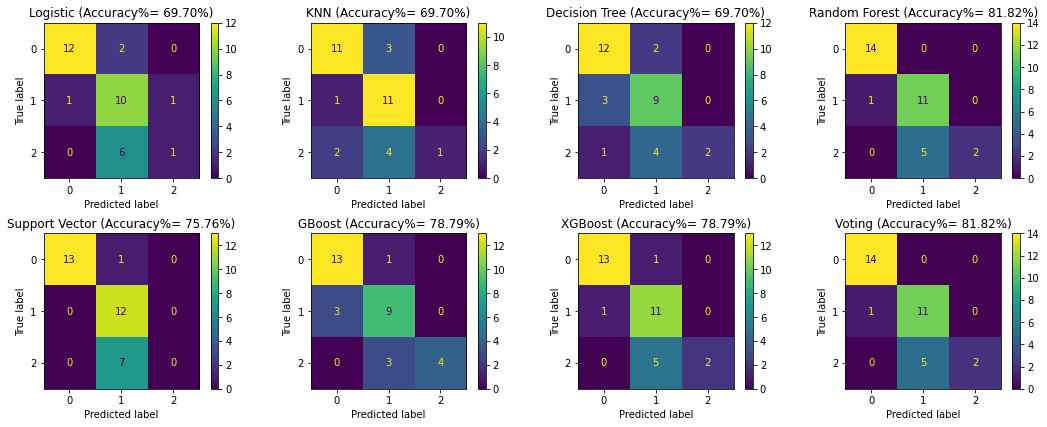

In [24]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

# 2 Classifications: (Both Sarc. Classes) with age

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited2sarcclasses.xlsx")
print(df)

    gender  age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0        1   64    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1        1   67    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2        0   56     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3        0   29     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4        1   82     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
..     ...  ...      ...     ...  ..  ...   ...      ...      ...      ...   
58       0   72     59.0     168  95  1.7  20.0  127.188   77.150   50.038   
59       1   72    124.0     182  73  2.4  37.4  225.685   78.253  147.431   
60       1   36     95.0     184  74  2.2  28.1  176.101   74.770  101.331   
61       0   52     78.0     170  71  1.9  27.0  186.885   70.471  116.414   
62       1   45     94.0     174  76  2.1  31.0  135.175   51.081   84.093   

    ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_

In [3]:
df.head(10)

gender  age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1   64    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1   67    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0   56     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0   29     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1   82     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1   61     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1   34    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0   69     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0   64     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0   25     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0   64  238.242  181.514   56.728  23.811     101.864      77.609   
1   67  262.539  181.558   80.981  30.845     118.614      82.027   
2   56   95.021   46.162   48.860  51.420      59.253      28.785   
3   29  320.154   67.640  252.514  78.873     186.564      39.416   
4   82  311.236  129.252  181.984  58.471     159.776      66.353   
5   61  157.995   87.447   70.548  44.652      73.060      40.437   
6   34  176.864  107.140   69.724  39.422      78.948      47.825   
7   69  130.226   46.267   83.959  64.472      83.430      29.641   
8   64  164.636   88.562   76.074  46.207      88.223      47.458   
9   25  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 38 columns]

In [5]:
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(1,0)
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(2,1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0   64  238.242  181.514   56.728  23.811     101.864      77.609   
1   67  262.539  181.558   80.981  30.845     118.614      82.027   
2   56   95.021   46.162   48.860  51.420      59.253      28.785   
3   29  320.154   67.640  252.514  78.873     186.564      39.416   
4   82  311.236  129.252  181.984  58.471     159.776      66.353   
5   61  157.995   87.447   70.548  44.652      73.060      40.437   
6   34  176.864  107.140   69.724  39.422      78.948      47.825   
7   69  130.226   46.267   83.959  64.472      83.430      29.641   
8   64  164.636   88.562   76.074  46.207      88.223      47.458   
9   25  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    0  
3                   -1.58                  1.92                    0  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    0  
7                    0.63                 -0.73                    1  
8                    1.67                 -2.37                    1  
9                    0.63                 -2.27                    0  

[10 rows x 38 columns]

In [6]:
features = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['age',
 'LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [7]:
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [8]:
#counting the outliers
for col_name, series_value in df.items():
    q1 = series_value.quantile(0.25)
    q3 = series_value.quantile(0.75)
    inter_quartile_range = q3 - q1
    outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
    percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
    print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

Outliers in column age = 3.17%
Outliers in column LV_EDV = 3.17%
Outliers in column LV_ESV = 11.11%
Outliers in column LV_SV = 4.76%
Outliers in column LV_EF = 4.76%
Outliers in column LV_EDV/BSA = 4.76%
Outliers in column LV_ESV/BSA = 11.11%
Outliers in column LV_radial_SAX_S = 3.17%
Outliers in column LV_circumf_SAX_S = 6.35%
Outliers in column LV_syst_radial_SAX_SR = 0.00%
Outliers in column LV_syst_circumf_SAX_SR = 6.35%
Outliers in column LV_diast_radial_SAX_SR = 1.59%
Outliers in column LV_diast_circumf_SAX_SR = 3.17%
Outliers in column LV_radial_LAX_S = 0.00%
Outliers in column LV_time_to_peak_long_LAX = 4.76%
Outliers in column LV_syst_radial_LAX_SR = 1.59%
Outliers in column LV_syst_long_LAX_SR = 1.59%
Outliers in column LV_diast_radial_LAX_SR = 1.59%
Outliers in column LV_diast_long_LAX_SR = 1.59%
Outliers in column RV_EDV = 1.59%
Outliers in column RV_ESV = 4.76%
Outliers in column RV_SV = 6.35%
Outliers in column RV_EF = 6.35%
Outliers in column RV_EDV/BSA = 1.59%
Outliers 

In [9]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)

In [10]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [11]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :37].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 37].values

In [12]:
X.shape

(63, 37)

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X

array([[ 64.   , 238.242, 181.514, ...,  -0.87 ,  -1.02 ,   0.69 ],
       [ 67.   , 262.539, 181.558, ...,   0.62 ,  -0.61 ,   0.59 ],
       [ 56.   ,  95.021,  46.162, ...,   2.97 ,   0.68 ,  -2.84 ],
       ...,
       [ 36.   , 176.101,  74.77 , ...,   2.11 ,   2.23 ,  -4.55 ],
       [ 52.   , 186.885,  70.471, ...,   2.72 ,   2.08 ,  -2.6  ],
       [ 45.   , 135.175,  51.081, ...,   3.31 ,   0.44 ,  -1.16 ]])

In [15]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [16]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((44, 37), (44,))  
Test: ((19, 37), (19,))


In [17]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 0.27818525,  0.12262744,  0.30640837, ..., -0.51181388,
         0.39986859,  0.21242206],
       [-1.89462261,  0.34668856,  0.71603393, ..., -0.29619867,
        -0.53765634,  0.49471584],
       [ 0.85760068, -1.11603038, -0.56955268, ...,  0.04878566,
         1.50406462, -0.77119532],
       ...,
       [ 0.35061218, -0.27545302, -0.73950605, ...,  0.48959898,
         0.62904135, -0.34775466],
       [ 0.49546604, -0.81400229, -0.63188508, ...,  0.59501086,
         1.09780382, -0.69621104],
       [ 1.14730839, -1.41144365, -1.07989789, ...,  1.25143939,
         1.57698323, -3.06483227]])

In [19]:
X_test

array([[-5.90937896e-01,  5.30309473e-01, -9.24793480e-02,
         1.08978063e+00,  5.25109876e-01,  6.63801637e-01,
        -6.12841469e-02, -1.54144821e-01,  6.01885203e-02,
        -2.92619072e-01,  2.76838997e-01,  2.58594813e-01,
        -2.51290126e-01,  8.29710210e-01,  4.61729103e-01,
         7.37594654e-01, -7.24792312e-02, -7.51783258e-01,
        -1.55302426e-02,  1.98074740e-01, -4.84268053e-01,
         1.58794433e+00,  1.20874908e+00,  2.98202676e-01,
        -4.90735625e-01, -9.15549187e-01,  9.68102940e-01,
        -5.66824972e-01,  6.46532970e-01,  5.26693266e-01,
        -1.25751262e-01, -2.16808031e-01,  4.67632923e-01,
        -9.12313952e-01, -4.70433185e-02,  8.26963281e-01,
         1.10972732e-01],
       [-5.18510967e-01,  7.43303134e-01, -1.03255877e+00,
         2.88032101e+00,  2.19229274e+00,  3.66989925e-01,
        -1.12526947e+00, -4.02895890e-01,  3.67062107e-01,
        -8.47387007e-01,  6.44564760e-01,  5.33185181e-04,
         1.47151875e-01, -2.82

In [20]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

`use_label_encoder` is deprecated in 1.7.0.


In [21]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

`use_label_encoder` is deprecated in 1.7.0.


In [22]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [23]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    0              0              0              0   
1         0           1    1              0              0              0   
2         1           1    1              1              1              1   
3         1           0    0              0              0              0   
4         1           0    0              0              0              0   
5         1           1    0              1              0              0   
6         0           0    1              0              0              0   
7         0           1    1              1              0              1   
8         0           1    1              1              1              1   
9         0           1    1              0              1              1   
10        0           0    0              0              0              0   
11        0           1    0              1              0              0   
12        0           0    0              0              0              0   
13        0           0    0              0              0              0   
14        0           0    0              1              0              0   
15        1           0    0              1              0              0   
16        0           1    1              1              1              0   
17        0           0    0              0              0              0   
18        0           0    0              0              0              0   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   0            0       0  
2                   1            1       1  
3                   0            0       0  
4                   0            0       0  
5                   1            1       1  
6                   0            0       0  
7                   1            1       1  
8                   1            1       1  
9                   0            0       1  
10                  0            0       0  
11                  1            0       0  
12                  0            0       0  
13                  0            0       0  
14                  0            0       0  
15                  1            0       0  
16                  1            1       1  
17                  0            0       0  
18                  0            0       0

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprec

Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.25      0.40      0.31         5

    accuracy                           0.53        19
   macro avg       0.49      0.49      0.47        19
weighted avg       0.60      0.53      0.55        19

KNN
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.14      0.20      0.17         5

    accuracy                           0.47        19
   macro avg       0.40      0.39      0.39        19
weighted avg       0.53      0.47      0.50        19

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.38      0.60      0.46         5

    accuracy                           0.63        19
   macro avg       0.60      0.62      0.59        19
weighted avg       0.70      0.63   

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Voting
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.33      0.40      0.36         5

    accuracy                           0.63        19
   macro avg       0.55      0.56      0.55        19
weighted avg       0.65      0.63      0.64        19



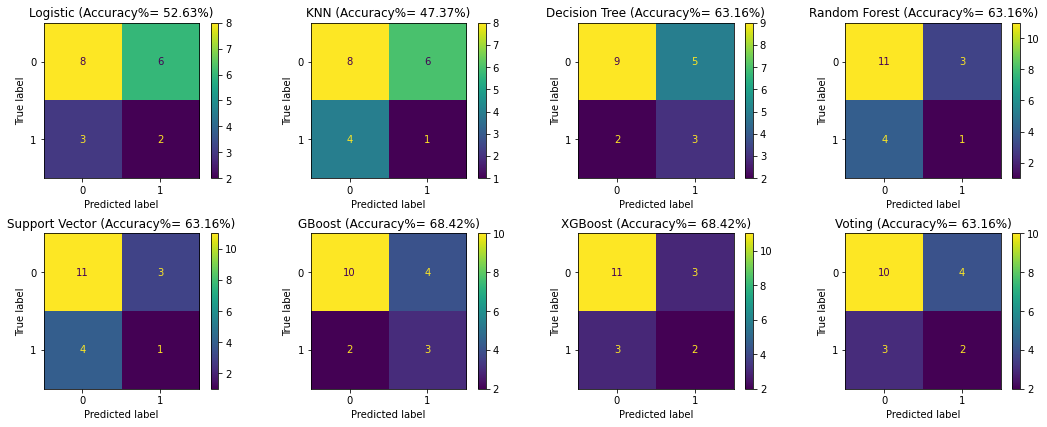

In [24]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

### ROC Curve:

In [25]:
from sklearn import metrics

auc_roc_reg=metrics.roc_auc_score(y_test,reg_pred)

auc_roc_knn=metrics.roc_auc_score(y_test,knn_pred)


In [26]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_reg, true_positive_rate_reg, thresholds = roc_curve(y_test,reg_pred)
roc_auc_reg = auc(false_positive_rate_reg, true_positive_rate_reg)

false_positive_rate_knn, true_positive_rate_knn, thresholds = roc_curve(y_test,knn_pred)
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)

false_positive_rate_dtree, true_positive_rate_dtree, thresholds = roc_curve(y_test,dtree_pred)
roc_auc_dtree = auc(false_positive_rate_dtree, true_positive_rate_dtree)

false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test,rf_pred)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)

false_positive_rate_svm, true_positive_rate_svm, thresholds = roc_curve(y_test,sv_pred)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)

false_positive_rate_gb, true_positive_rate_gb, thresholds = roc_curve(y_test,gb_pred)
roc_auc_gb = auc(false_positive_rate_gb, true_positive_rate_gb)

false_positive_rate_xgb, true_positive_rate_xgb, thresholds = roc_curve(y_test,xgb_pred)
roc_auc_xgb = auc(false_positive_rate_xgb, true_positive_rate_xgb)

false_positive_rate_vt, true_positive_rate_vt, thresholds = roc_curve(y_test,vot_pred)
roc_auc_vt = auc(false_positive_rate_vt, true_positive_rate_vt)


Text(0.5, 0, 'False Positive Rate')

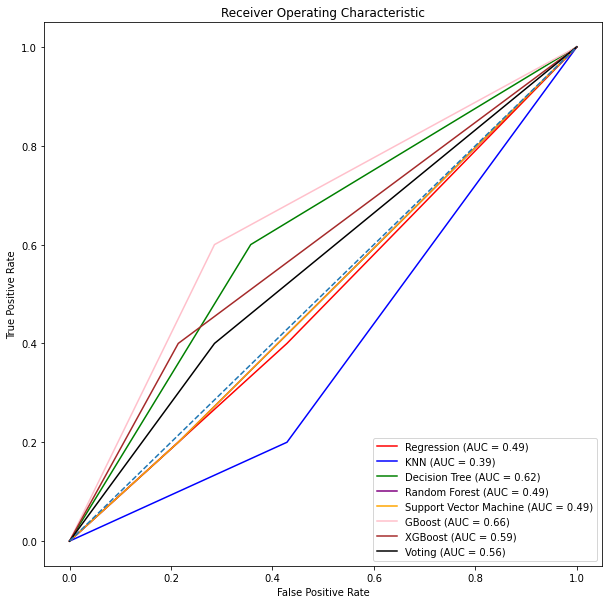

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_reg,true_positive_rate_reg, color='red',label = 'Regression (AUC = %0.2f)' % roc_auc_reg)
plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='blue',label = 'KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(false_positive_rate_dtree,true_positive_rate_dtree, color='green',label = 'Decision Tree (AUC = %0.2f)' % roc_auc_dtree)
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='purple',label = 'Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(false_positive_rate_svm,true_positive_rate_svm, color='orange',label = 'Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot(false_positive_rate_gb,true_positive_rate_gb, color='pink',label = 'GBoost (AUC = %0.2f)' % roc_auc_gb)
plt.plot(false_positive_rate_xgb,true_positive_rate_xgb, color='brown',label = 'XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(false_positive_rate_vt,true_positive_rate_vt, color='black',label = 'Voting (AUC = %0.2f)' % roc_auc_vt)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 2 Classifications: (healthy and Sarc.) without age

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/2classes/SVM_no_units_edited2classes.xlsx")
print(df)

     gender        age  Gewicht  Height  HR       BSA        BMI   LV_EDV  \
0         1  64.000000    108.0     192  87  2.400000  29.400000  238.242   
1         1  67.000000    103.0     175  57  2.200000  33.600000  262.539   
2         0  56.000000     56.0     164  75  1.600000  20.800000   95.021   
3         0  29.000000     65.0     165  68  1.700000  23.900000  320.154   
4         1  82.000000     80.0     174  70  1.900000  26.400000  311.236   
..      ...        ...      ...     ...  ..       ...        ...      ...   
102       0  62.893151     58.0     156  74  1.569779  23.833005   86.800   
103       0  54.230137     67.0     165  55  1.738297  24.609734  128.600   
104       1  66.230137     83.0     176  63  1.995130  26.794938  165.200   
105       1  52.545205     75.0     178  76  1.926734  23.671254  125.300   
106       1  53.358904     82.0     178  53  2.001206  25.880571  144.900   

      LV_ESV    LV_SV  ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  \


In [3]:
df.head(10)

gender   age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1  64.0    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1  67.0    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0  56.0     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0  29.0     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1  82.0     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1  61.0     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1  34.0    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0  69.0     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0  64.0     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0  25.0     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    1  
8                    1.67                 -2.37                    1  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['age','gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  LV_radial_SAX_S  \
0  238.242  181.514   56.728  23.811     101.864      77.609            18.41   
1  262.539  181.558   80.981  30.845     118.614      82.027             9.31   
2   95.021   46.162   48.860  51.420      59.253      28.785            22.81   
3  320.154   67.640  252.514  78.873     186.564      39.416            32.98   
4  311.236  129.252  181.984  58.471     159.776      66.353            13.19   
5  157.995   87.447   70.548  44.652      73.060      40.437            23.17   
6  176.864  107.140   69.724  39.422      78.948      47.825            15.59   
7  130.226   46.267   83.959  64.472      83.430      29.641            25.78   
8  164.636   88.562   76.074  46.207      88.223      47.458            17.70   
9  151.861   62.639   89.221  58.752      78.868      32.531            23.92   

   LV_circumf_SAX_S  LV_syst_radial_SAX_SR  LV_syst_circumf_SAX_SR  ...  \
0             -9.11                   0.58                   -0.79  ...   
1             -7.14                   0.54                   -0.49  ...   
2            -15.05                   1.14                   -0.72  ...   
3            -18.86                   1.78                   -1.17  ...   
4             -9.41                   0.59                   -0.41  ...   
5            -15.37                   1.19                   -0.82  ...   
6            -11.24                   0.90                   -0.71  ...   
7            -16.03                   0.97                   -0.68  ...   
8            -12.49                   0.71                   -0.50  ...   
9            -15.54                   1.30                   -0.95  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    1  
7                    0.63        

In [5]:
features = [ 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [6]:
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [7]:
#counting the outliers
for col_name, series_value in df.items():
    q1 = series_value.quantile(0.25)
    q3 = series_value.quantile(0.75)
    inter_quartile_range = q3 - q1
    outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
    percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
    print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

Outliers in column LV_EDV = 4.67%
Outliers in column LV_ESV = 7.48%
Outliers in column LV_SV = 2.80%
Outliers in column LV_EF = 9.35%
Outliers in column LV_EDV/BSA = 7.48%
Outliers in column LV_ESV/BSA = 8.41%
Outliers in column LV_radial_SAX_S = 4.67%
Outliers in column LV_circumf_SAX_S = 3.74%
Outliers in column LV_syst_radial_SAX_SR = 5.61%
Outliers in column LV_syst_circumf_SAX_SR = 3.74%
Outliers in column LV_diast_radial_SAX_SR = 0.00%
Outliers in column LV_diast_circumf_SAX_SR = 0.00%
Outliers in column LV_radial_LAX_S = 9.35%
Outliers in column LV_time_to_peak_long_LAX = 2.80%
Outliers in column LV_syst_radial_LAX_SR = 5.61%
Outliers in column LV_syst_long_LAX_SR = 4.67%
Outliers in column LV_diast_radial_LAX_SR = 0.93%
Outliers in column LV_diast_long_LAX_SR = 0.93%
Outliers in column RV_EDV = 0.93%
Outliers in column RV_ESV = 6.54%
Outliers in column RV_SV = 3.74%
Outliers in column RV_EF = 6.54%
Outliers in column RV_EDV/BSA = 4.67%
Outliers in column RV_ESV/BSA = 8.41%
Outl

In [8]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)

In [9]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [10]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :36].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 36].values

In [11]:
X.shape

(107, 36)

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X

array([[238.242, 181.514,  56.728, ...,  -0.87 ,  -1.02 ,   0.69 ],
       [262.539, 181.558,  80.981, ...,   0.62 ,  -0.61 ,   0.59 ],
       [ 95.021,  46.162,  48.86 , ...,   2.97 ,   0.68 ,  -2.84 ],
       ...,
       [165.2  ,  61.5  , 103.7  , ...,   2.05 ,   2.17 ,  -3.44 ],
       [125.3  ,  47.7  ,  77.6  , ...,   2.72 ,   2.21 ,  -2.51 ],
       [144.9  ,  52.7  ,  92.2  , ...,   2.05 ,   2.17 ,  -3.44 ]])

In [14]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 36), (74,))  
Test: ((33, 36), (33,))


In [16]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-1.12142601, -0.39854187, -1.20193532, ...,  0.10189828,
         1.42382968, -1.05091934],
       [-0.33813305, -0.53783658,  0.19455302, ..., -0.58675578,
        -0.20066568,  0.76227931],
       [ 0.18185501,  0.03023419,  0.23849143, ..., -0.38421047,
         0.66878254, -0.15898991],
       ...,
       [-0.44781804, -0.74910256,  0.30753751, ..., -0.15851712,
        -0.15490525,  0.22242728],
       [-0.78662276, -0.46490286, -0.59593043, ...,  0.76161729,
         0.97766546, -0.95116408],
       [-1.3293603 , -1.00262175, -0.71559984, ...,  0.08453725,
         0.26837875, -0.09444239]])

In [18]:
X_test

array([[-0.64484476, -0.86177776,  0.15375306, ..., -0.07171199,
        -0.55530904, -0.34676453],
       [-0.77079969, -0.11659567, -1.03713488, ...,  3.21530908,
        -0.15490525, -1.03331547],
       [ 3.22939131,  1.48919016,  2.99669399, ..., -0.96291136,
        -0.90995239,  1.17303628],
       ...,
       [-1.30701706, -0.93924195, -0.76581517, ...,  0.29865658,
         0.62302211, -0.26461313],
       [-0.92921324, -0.86647256, -0.27935416, ...,  0.40282274,
         1.06918633, -0.35263248],
       [-0.00783907, -0.07448332,  0.08536606, ..., -0.3379144 ,
        -0.97859304,  0.31631459]])

In [19]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [20]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [21]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [22]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    1              0              0              0   
1         1           1    1              1              1              1   
2         1           1    1              1              1              1   
3         0           0    0              0              0              0   
4         0           0    0              0              0              0   
5         0           0    0              0              0              0   
6         1           1    1              1              1              1   
7         1           1    1              1              1              1   
8         0           0    0              0              0              0   
9         1           1    1              1              1              1   
10        0           0    0              0              0              0   
11        1           1    0              1              1              1   
12        1           1    1              1              1              1   
13        0           0    1              0              0              0   
14        1           1    1              1              1              1   
15        0           0    0              0              0              0   
16        1           0    1              0              0              1   
17        0           0    0              0              0              0   
18        0           0    1              1              0              0   
19        1           1    1              1              1              1   
20        1           1    1              1              1              1   
21        1           1    1              1              1              1   
22        0           0    0              0              0              0   
23        1           1    1              1              1              1   
24        1           1    1              0              1              1   
25        1           1    1              0              1              1   
26        1           1    1              1              1              1   
27        0           0    0              0              0              0   
28        1           1    1              1              1              1   
29        1           1    1              1              1              1   
30        0           0    0              0              0              0   
31        0           0    1              0              0              1   
32        1           1    1              1              1              1   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   1            1       1  
2                   1            1       1  
3                   0            0       0  
4                   0            0       0  
5                   0            0       0  
6                   1            1       1  
7                   1            1       1  
8                   0            1       0  
9                   1            1       1  
10                  0            0       0  
11                  1            1       1  
12                  1            1       1  
13                  0            0       0  
14                  1            1       1  
15                  0            0       0  
16                  0            0       0  
17                  0            0       0  
18                  1            1       1  
19                  1            1       1  
20                  1            1       1  
21                  1            1       1  
22                  0            0       0  
23                  1            1       1  
24                  0            1       1  
25                  0            1       1  
26                  1            1       1  
27                  0            0       0  
28                  1            1       1  
29                  1            1 

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        19

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

KNN
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.82      0.95      0.88        19

    accuracy                           0.85        33
   macro avg       0.86      0.83      0.84        33
weighted avg       0.86      0.85      0.84        33

Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.94      0.84      0.89        19

    accuracy                           0.88        33
   macro avg       0.88      0.89      0.88        33
weighted avg       0.89      0.88   

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


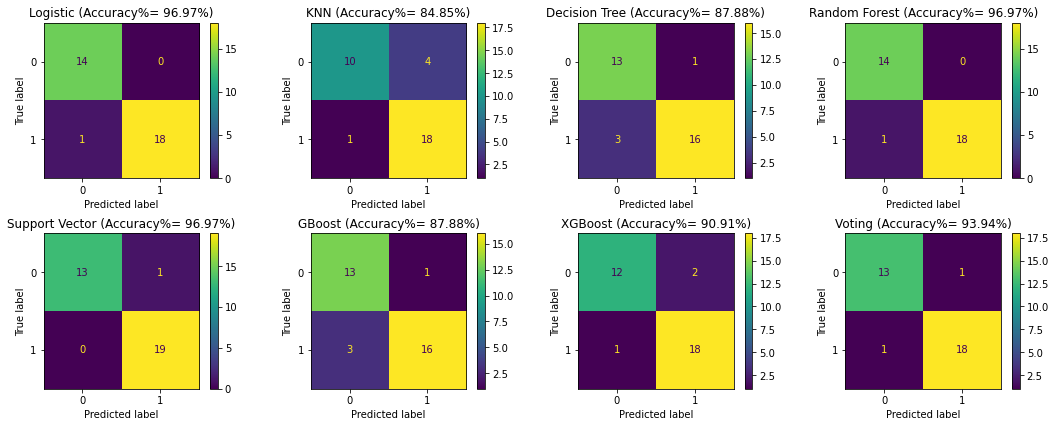

In [23]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

# 2 Classifications: (healthy and Sarc.) with age

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/2classes/SVM_no_units_edited2classes.xlsx")
print(df)

     gender        age  Gewicht  Height  HR       BSA        BMI   LV_EDV  \
0         1  64.000000    108.0     192  87  2.400000  29.400000  238.242   
1         1  67.000000    103.0     175  57  2.200000  33.600000  262.539   
2         0  56.000000     56.0     164  75  1.600000  20.800000   95.021   
3         0  29.000000     65.0     165  68  1.700000  23.900000  320.154   
4         1  82.000000     80.0     174  70  1.900000  26.400000  311.236   
..      ...        ...      ...     ...  ..       ...        ...      ...   
102       0  62.893151     58.0     156  74  1.569779  23.833005   86.800   
103       0  54.230137     67.0     165  55  1.738297  24.609734  128.600   
104       1  66.230137     83.0     176  63  1.995130  26.794938  165.200   
105       1  52.545205     75.0     178  76  1.926734  23.671254  125.300   
106       1  53.358904     82.0     178  53  2.001206  25.880571  144.900   

      LV_ESV    LV_SV  ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  \


In [3]:
df.head(10)

gender   age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1  64.0    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1  67.0    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0  56.0     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0  29.0     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1  82.0     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1  61.0     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1  34.0    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0  69.0     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0  64.0     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0  25.0     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    1  
8                    1.67                 -2.37                    1  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0  64.0  238.242  181.514   56.728  23.811     101.864      77.609   
1  67.0  262.539  181.558   80.981  30.845     118.614      82.027   
2  56.0   95.021   46.162   48.860  51.420      59.253      28.785   
3  29.0  320.154   67.640  252.514  78.873     186.564      39.416   
4  82.0  311.236  129.252  181.984  58.471     159.776      66.353   
5  61.0  157.995   87.447   70.548  44.652      73.060      40.437   
6  34.0  176.864  107.140   69.724  39.422      78.948      47.825   
7  69.0  130.226   46.267   83.959  64.472      83.430      29.641   
8  64.0  164.636   88.562   76.074  46.207      88.223      47.458   
9  25.0  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    1  
8                    1.67                 -2.37                    1  
9                    0.63                 -2.27                    1  

[10 rows x 38 col

In [5]:
features = [ 'age','LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['age',
 'LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [6]:
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [7]:
#counting the outliers
for col_name, series_value in df.items():
    q1 = series_value.quantile(0.25)
    q3 = series_value.quantile(0.75)
    inter_quartile_range = q3 - q1
    outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
    percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
    print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

Outliers in column age = 3.74%
Outliers in column LV_EDV = 4.67%
Outliers in column LV_ESV = 7.48%
Outliers in column LV_SV = 2.80%
Outliers in column LV_EF = 9.35%
Outliers in column LV_EDV/BSA = 7.48%
Outliers in column LV_ESV/BSA = 8.41%
Outliers in column LV_radial_SAX_S = 4.67%
Outliers in column LV_circumf_SAX_S = 3.74%
Outliers in column LV_syst_radial_SAX_SR = 5.61%
Outliers in column LV_syst_circumf_SAX_SR = 3.74%
Outliers in column LV_diast_radial_SAX_SR = 0.00%
Outliers in column LV_diast_circumf_SAX_SR = 0.00%
Outliers in column LV_radial_LAX_S = 9.35%
Outliers in column LV_time_to_peak_long_LAX = 2.80%
Outliers in column LV_syst_radial_LAX_SR = 5.61%
Outliers in column LV_syst_long_LAX_SR = 4.67%
Outliers in column LV_diast_radial_LAX_SR = 0.93%
Outliers in column LV_diast_long_LAX_SR = 0.93%
Outliers in column RV_EDV = 0.93%
Outliers in column RV_ESV = 6.54%
Outliers in column RV_SV = 3.74%
Outliers in column RV_EF = 6.54%
Outliers in column RV_EDV/BSA = 4.67%
Outliers in

In [8]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)

In [9]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [10]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :37].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 37].values

In [11]:
X.shape

(107, 37)

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X

array([[ 64.        , 238.242     , 181.514     , ...,  -0.87      ,
         -1.02      ,   0.69      ],
       [ 67.        , 262.539     , 181.558     , ...,   0.62      ,
         -0.61      ,   0.59      ],
       [ 56.        ,  95.021     ,  46.162     , ...,   2.97      ,
          0.68      ,  -2.84      ],
       ...,
       [ 66.23013699, 165.2       ,  61.5       , ...,   2.05      ,
          2.17      ,  -3.44      ],
       [ 52.54520548, 125.3       ,  47.7       , ...,   2.72      ,
          2.21      ,  -2.51      ],
       [ 53.35890411, 144.9       ,  52.7       , ...,   2.05      ,
          2.17      ,  -3.44      ]])

In [14]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 37), (74,))  
Test: ((33, 37), (33,))


In [16]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[ 1.21334039, -1.12142601, -0.39854187, ...,  0.10189828,
         1.42382968, -1.05091934],
       [-0.30625419, -0.33813305, -0.53783658, ..., -0.58675578,
        -0.20066568,  0.76227931],
       [ 0.78201851,  0.18185501,  0.03023419, ..., -0.38421047,
         0.66878254, -0.15898991],
       ...,
       [ 0.14758367, -0.44781804, -0.74910256, ..., -0.15851712,
        -0.15490525,  0.22242728],
       [ 0.7853021 , -0.78662276, -0.46490286, ...,  0.76161729,
         0.97766546, -0.95116408],
       [ 0.43372434, -1.3293603 , -1.00262175, ...,  0.08453725,
         0.26837875, -0.09444239]])

In [18]:
X_test

array([[-0.06842908, -0.64484476, -0.86177776, ..., -0.07171199,
        -0.55530904, -0.34676453],
       [-0.15638215, -0.77079969, -0.11659567, ...,  3.21530908,
        -0.15490525, -1.03331547],
       [ 2.06941698,  3.22939131,  1.48919016, ..., -0.96291136,
        -0.90995239,  1.17303628],
       ...,
       [-0.58676586, -1.30701706, -0.93924195, ...,  0.29865658,
         0.62302211, -0.26461313],
       [-0.23260815, -0.92921324, -0.86647256, ...,  0.40282274,
         1.06918633, -0.35263248],
       [-2.81021957, -0.00783907, -0.07448332, ..., -0.3379144 ,
        -0.97859304,  0.31631459]])

In [19]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

`use_label_encoder` is deprecated in 1.7.0.


In [20]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

`use_label_encoder` is deprecated in 1.7.0.


In [21]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [22]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    0              0              0              0   
1         1           1    1              1              1              1   
2         1           1    1              1              1              1   
3         0           0    0              0              0              0   
4         0           0    0              0              0              0   
5         0           0    0              0              0              0   
6         1           1    1              1              1              1   
7         1           1    1              1              1              1   
8         0           0    0              1              0              0   
9         1           1    1              1              1              1   
10        0           0    0              0              0              0   
11        1           1    0              1              1              1   
12        1           1    1              1              1              1   
13        0           0    1              0              0              0   
14        1           1    1              1              1              1   
15        0           0    0              0              0              0   
16        1           0    1              0              0              1   
17        0           0    0              0              0              0   
18        0           0    1              1              0              0   
19        1           1    1              1              1              1   
20        1           1    1              1              1              1   
21        1           1    1              1              1              1   
22        0           0    0              0              0              0   
23        1           1    1              1              1              1   
24        1           1    1              0              1              1   
25        1           1    1              0              1              1   
26        1           1    1              1              1              1   
27        0           0    0              0              0              0   
28        1           1    1              1              1              1   
29        1           1    1              1              1              1   
30        0           0    0              0              0              0   
31        0           0    1              0              0              1   
32        1           1    1              1              1              1   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   1            1       1  
2                   1            1       1  
3                   0            0       0  
4                   0            0       0  
5                   0            0       0  
6                   1            1       1  
7                   1            1       1  
8                   0            1       0  
9                   1            1       1  
10                  0            0       0  
11                  1            1       1  
12                  1            1       1  
13                  0            0       0  
14                  1            1       1  
15                  0            0       0  
16                  0            0       0  
17                  0            0       0  
18                  1            1       1  
19                  1            1       1  
20                  1            1       1  
21                  1            1       1  
22                  0            0       0  
23                  1            1       1  
24                  0            1       1  
25                  0            1       1  
26                  1            1       1  
27                  0            0       0  
28                  1            1       1  
29                  1            1 

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprec

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        19

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

KNN
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.86      0.95      0.90        19

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.87        33
weighted avg       0.88      0.88      0.88        33

Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.89      0.84      0.86        19

    accuracy                           0.85        33
   macro avg       0.84      0.85      0.85        33
weighted avg       0.85      0.85   

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


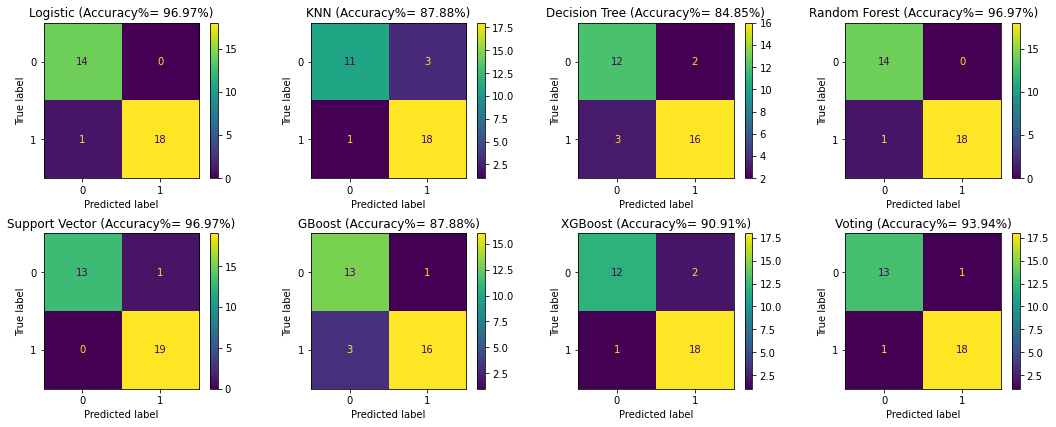

In [23]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

### ROC Curve:

In [24]:
from sklearn import metrics

auc_roc_reg=metrics.roc_auc_score(y_test,reg_pred)

auc_roc_knn=metrics.roc_auc_score(y_test,knn_pred)


In [25]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_reg, true_positive_rate_reg, thresholds = roc_curve(y_test,reg_pred)
roc_auc_reg = auc(false_positive_rate_reg, true_positive_rate_reg)

false_positive_rate_knn, true_positive_rate_knn, thresholds = roc_curve(y_test,knn_pred)
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)

false_positive_rate_dtree, true_positive_rate_dtree, thresholds = roc_curve(y_test,dtree_pred)
roc_auc_dtree = auc(false_positive_rate_dtree, true_positive_rate_dtree)

false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test,rf_pred)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)

false_positive_rate_svm, true_positive_rate_svm, thresholds = roc_curve(y_test,sv_pred)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)

false_positive_rate_gb, true_positive_rate_gb, thresholds = roc_curve(y_test,gb_pred)
roc_auc_gb = auc(false_positive_rate_gb, true_positive_rate_gb)

false_positive_rate_xgb, true_positive_rate_xgb, thresholds = roc_curve(y_test,xgb_pred)
roc_auc_xgb = auc(false_positive_rate_xgb, true_positive_rate_xgb)

false_positive_rate_vt, true_positive_rate_vt, thresholds = roc_curve(y_test,vot_pred)
roc_auc_vt = auc(false_positive_rate_vt, true_positive_rate_vt)


Text(0.5, 0, 'False Positive Rate')

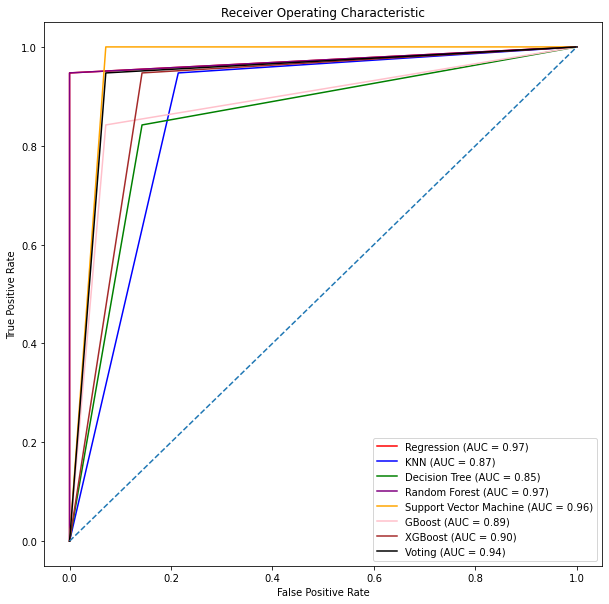

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_reg,true_positive_rate_reg, color='red',label = 'Regression (AUC = %0.2f)' % roc_auc_reg)
plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='blue',label = 'KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(false_positive_rate_dtree,true_positive_rate_dtree, color='green',label = 'Decision Tree (AUC = %0.2f)' % roc_auc_dtree)
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='purple',label = 'Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(false_positive_rate_svm,true_positive_rate_svm, color='orange',label = 'Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot(false_positive_rate_gb,true_positive_rate_gb, color='pink',label = 'GBoost (AUC = %0.2f)' % roc_auc_gb)
plt.plot(false_positive_rate_xgb,true_positive_rate_xgb, color='brown',label = 'XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(false_positive_rate_vt,true_positive_rate_vt, color='black',label = 'Voting (AUC = %0.2f)' % roc_auc_vt)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

*Seems that "age" is NOT an effective metric to calssify healthy volunteers and sarc. groups.*

# 2 Classifications: (Both Sarc. Classes) without age

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited2sarcclasses.xlsx")
print(df)

    gender  age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0        1   64    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1        1   67    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2        0   56     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3        0   29     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4        1   82     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
..     ...  ...      ...     ...  ..  ...   ...      ...      ...      ...   
58       0   72     59.0     168  95  1.7  20.0  127.188   77.150   50.038   
59       1   72    124.0     182  73  2.4  37.4  225.685   78.253  147.431   
60       1   36     95.0     184  74  2.2  28.1  176.101   74.770  101.331   
61       0   52     78.0     170  71  1.9  27.0  186.885   70.471  116.414   
62       1   45     94.0     174  76  2.1  31.0  135.175   51.081   84.093   

    ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_

In [3]:
df.head(10)

gender  age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1   64    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1   67    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0   56     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0   29     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1   82     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1   61     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1   34    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0   69     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0   64     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0   25     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['age','gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  LV_radial_SAX_S  \
0  238.242  181.514   56.728  23.811     101.864      77.609            18.41   
1  262.539  181.558   80.981  30.845     118.614      82.027             9.31   
2   95.021   46.162   48.860  51.420      59.253      28.785            22.81   
3  320.154   67.640  252.514  78.873     186.564      39.416            32.98   
4  311.236  129.252  181.984  58.471     159.776      66.353            13.19   
5  157.995   87.447   70.548  44.652      73.060      40.437            23.17   
6  176.864  107.140   69.724  39.422      78.948      47.825            15.59   
7  130.226   46.267   83.959  64.472      83.430      29.641            25.78   
8  164.636   88.562   76.074  46.207      88.223      47.458            17.70   
9  151.861   62.639   89.221  58.752      78.868      32.531            23.92   

   LV_circumf_SAX_S  LV_syst_radial_SAX_SR  LV_syst_circumf_SAX_SR  ...  \
0             -9.11                   0.58                   -0.79  ...   
1             -7.14                   0.54                   -0.49  ...   
2            -15.05                   1.14                   -0.72  ...   
3            -18.86                   1.78                   -1.17  ...   
4             -9.41                   0.59                   -0.41  ...   
5            -15.37                   1.19                   -0.82  ...   
6            -11.24                   0.90                   -0.71  ...   
7            -16.03                   0.97                   -0.68  ...   
8            -12.49                   0.71                   -0.50  ...   
9            -15.54                   1.30                   -0.95  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63        

In [5]:
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(1,0)
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(2,1)
df.head(10)

LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  LV_radial_SAX_S  \
0  238.242  181.514   56.728  23.811     101.864      77.609            18.41   
1  262.539  181.558   80.981  30.845     118.614      82.027             9.31   
2   95.021   46.162   48.860  51.420      59.253      28.785            22.81   
3  320.154   67.640  252.514  78.873     186.564      39.416            32.98   
4  311.236  129.252  181.984  58.471     159.776      66.353            13.19   
5  157.995   87.447   70.548  44.652      73.060      40.437            23.17   
6  176.864  107.140   69.724  39.422      78.948      47.825            15.59   
7  130.226   46.267   83.959  64.472      83.430      29.641            25.78   
8  164.636   88.562   76.074  46.207      88.223      47.458            17.70   
9  151.861   62.639   89.221  58.752      78.868      32.531            23.92   

   LV_circumf_SAX_S  LV_syst_radial_SAX_SR  LV_syst_circumf_SAX_SR  ...  \
0             -9.11                   0.58                   -0.79  ...   
1             -7.14                   0.54                   -0.49  ...   
2            -15.05                   1.14                   -0.72  ...   
3            -18.86                   1.78                   -1.17  ...   
4             -9.41                   0.59                   -0.41  ...   
5            -15.37                   1.19                   -0.82  ...   
6            -11.24                   0.90                   -0.71  ...   
7            -16.03                   0.97                   -0.68  ...   
8            -12.49                   0.71                   -0.50  ...   
9            -15.54                   1.30                   -0.95  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    0  
3                   -1.58                  1.92                    0  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    0  
7                    0.63        

In [6]:
features = ['LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [7]:
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [8]:
#counting the outliers
for col_name, series_value in df.items():
    q1 = series_value.quantile(0.25)
    q3 = series_value.quantile(0.75)
    inter_quartile_range = q3 - q1
    outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
    percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
    print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

Outliers in column LV_EDV = 3.17%
Outliers in column LV_ESV = 11.11%
Outliers in column LV_SV = 4.76%
Outliers in column LV_EF = 4.76%
Outliers in column LV_EDV/BSA = 4.76%
Outliers in column LV_ESV/BSA = 11.11%
Outliers in column LV_radial_SAX_S = 3.17%
Outliers in column LV_circumf_SAX_S = 6.35%
Outliers in column LV_syst_radial_SAX_SR = 0.00%
Outliers in column LV_syst_circumf_SAX_SR = 6.35%
Outliers in column LV_diast_radial_SAX_SR = 1.59%
Outliers in column LV_diast_circumf_SAX_SR = 3.17%
Outliers in column LV_radial_LAX_S = 0.00%
Outliers in column LV_time_to_peak_long_LAX = 4.76%
Outliers in column LV_syst_radial_LAX_SR = 1.59%
Outliers in column LV_syst_long_LAX_SR = 1.59%
Outliers in column LV_diast_radial_LAX_SR = 1.59%
Outliers in column LV_diast_long_LAX_SR = 1.59%
Outliers in column RV_EDV = 1.59%
Outliers in column RV_ESV = 4.76%
Outliers in column RV_SV = 6.35%
Outliers in column RV_EF = 6.35%
Outliers in column RV_EDV/BSA = 1.59%
Outliers in column RV_ESV/BSA = 7.94%
Ou

In [9]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)

In [10]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [11]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :36].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 36].values

In [12]:
X.shape

(63, 36)

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X

array([[238.242, 181.514,  56.728, ...,  -0.87 ,  -1.02 ,   0.69 ],
       [262.539, 181.558,  80.981, ...,   0.62 ,  -0.61 ,   0.59 ],
       [ 95.021,  46.162,  48.86 , ...,   2.97 ,   0.68 ,  -2.84 ],
       ...,
       [176.101,  74.77 , 101.331, ...,   2.11 ,   2.23 ,  -4.55 ],
       [186.885,  70.471, 116.414, ...,   2.72 ,   2.08 ,  -2.6  ],
       [135.175,  51.081,  84.093, ...,   3.31 ,   0.44 ,  -1.16 ]])

In [15]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [16]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((44, 36), (44,))  
Test: ((19, 36), (19,))


In [17]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 0.12262744,  0.30640837, -0.24140991, ..., -0.51181388,
         0.39986859,  0.21242206],
       [ 0.34668856,  0.71603393, -0.45095527, ..., -0.29619867,
        -0.53765634,  0.49471584],
       [-1.11603038, -0.56955268, -1.16109956, ...,  0.04878566,
         1.50406462, -0.77119532],
       ...,
       [-0.27545302, -0.73950605,  0.60703432, ...,  0.48959898,
         0.62904135, -0.34775466],
       [-0.81400229, -0.63188508, -0.52391666, ...,  0.59501086,
         1.09780382, -0.69621104],
       [-1.41144365, -1.07989789, -0.92934568, ...,  1.25143939,
         1.57698323, -3.06483227]])

In [19]:
X_test

array([[ 5.30309473e-01, -9.24793480e-02,  1.08978063e+00,
         5.25109876e-01,  6.63801637e-01, -6.12841469e-02,
        -1.54144821e-01,  6.01885203e-02, -2.92619072e-01,
         2.76838997e-01,  2.58594813e-01, -2.51290126e-01,
         8.29710210e-01,  4.61729103e-01,  7.37594654e-01,
        -7.24792312e-02, -7.51783258e-01, -1.55302426e-02,
         1.98074740e-01, -4.84268053e-01,  1.58794433e+00,
         1.20874908e+00,  2.98202676e-01, -4.90735625e-01,
        -9.15549187e-01,  9.68102940e-01, -5.66824972e-01,
         6.46532970e-01,  5.26693266e-01, -1.25751262e-01,
        -2.16808031e-01,  4.67632923e-01, -9.12313952e-01,
        -4.70433185e-02,  8.26963281e-01,  1.10972732e-01],
       [ 7.43303134e-01, -1.03255877e+00,  2.88032101e+00,
         2.19229274e+00,  3.66989925e-01, -1.12526947e+00,
        -4.02895890e-01,  3.67062107e-01, -8.47387007e-01,
         6.44564760e-01,  5.33185181e-04,  1.47151875e-01,
        -2.82078798e-01, -5.18390836e-01, -1.53909080e-

In [20]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [21]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [22]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [23]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    0              0              0              0   
1         0           1    1              0              0              0   
2         1           1    0              1              1              1   
3         1           0    0              0              0              0   
4         1           0    0              0              0              0   
5         1           1    0              1              0              0   
6         0           0    1              0              0              0   
7         0           1    0              1              0              1   
8         0           1    1              1              1              1   
9         0           0    1              0              0              1   
10        0           0    0              0              0              0   
11        0           0    0              0              0              0   
12        0           1    0              0              0              0   
13        0           0    0              0              0              0   
14        0           0    0              0              0              0   
15        1           0    0              0              0              0   
16        0           1    1              1              1              0   
17        0           0    0              0              0              0   
18        0           0    0              0              0              0   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   0            0       0  
2                   1            1       1  
3                   0            0       0  
4                   0            0       0  
5                   1            0       0  
6                   0            0       0  
7                   1            1       1  
8                   1            1       1  
9                   0            0       0  
10                  0            0       0  
11                  0            0       0  
12                  0            0       0  
13                  0            0       0  
14                  0            0       0  
15                  1            0       0  
16                  1            1       1  
17                  0            0       0  
18                  0            0       0

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.29      0.40      0.33         5

    accuracy                           0.58        19
   macro avg       0.52      0.52      0.51        19
weighted avg       0.63      0.58      0.60        19

KNN
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.00      0.00      0.00         5

    accuracy                           0.47        19
   macro avg       0.32      0.32      0.32        19
weighted avg       0.47      0.47      0.47        19

Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.40      0.40      0.40         5

    accuracy                           0.68        19
   macro avg       0.59      0.59      0.59        19
weighted avg       0.68      0.68   

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

GBoost
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.50      0.60      0.55         5

    accuracy                           0.74        19
   macro avg       0.67      0.69      0.68        19
weighted avg       0.76      0.74      0.74        19

XGBoost
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.25      0.20      0.22         5

    accuracy                           0.63        19
   macro avg       0.49      0.49      0.49        19
weighted avg       0.61      0.63      0.62        19

Voting
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.25      0.20      0.22         5

    accuracy                           0.63        19
   macro avg       0.49      0.49      0.49        19
weighted avg       0.61      0.63      0.62        1

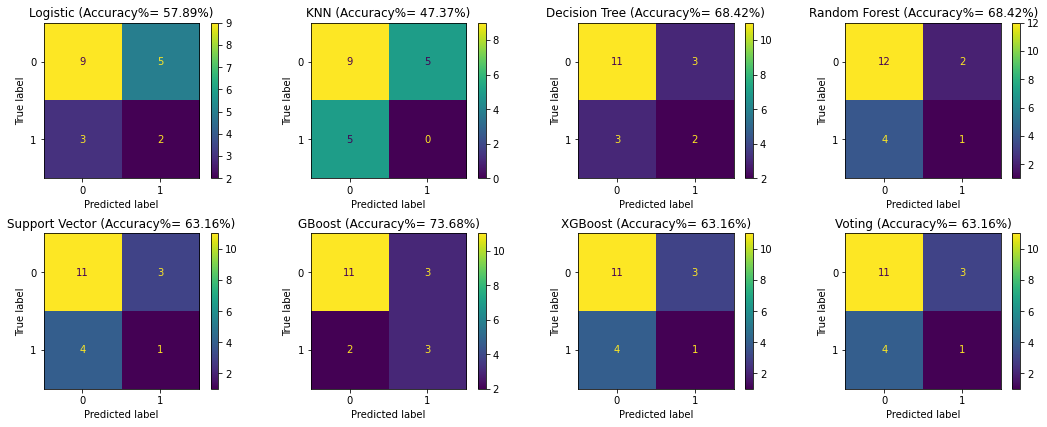

In [24]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

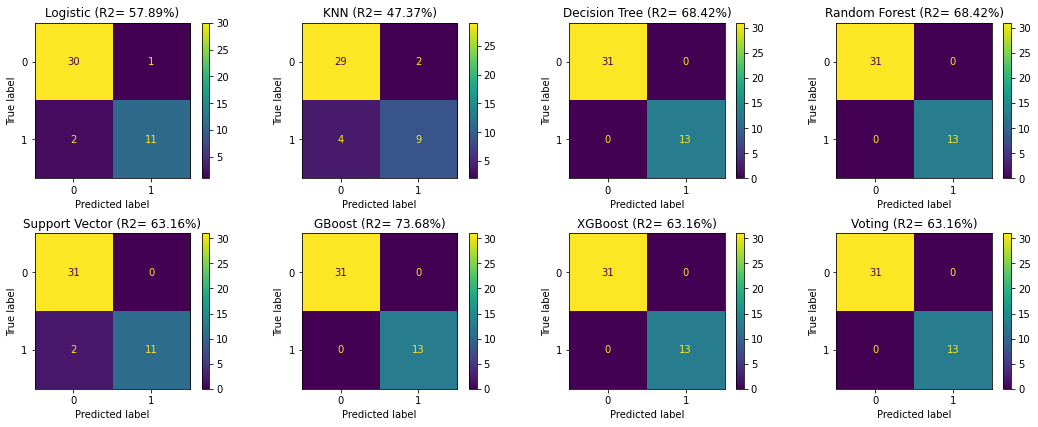

In [25]:
# Performance on the train set. Since it doesn't have a good performance on both train and test sets: it means that the model is not overfit on test set and I need to change another model.
# If the training performance was good and test performace was not good it means that the model is overfit and needs some regularization like L1 or L2 to reduce the complexity. or we could use feature reduction using PCA or Shallow DNN (1 or 2 hidden layers 16, 32 nodes each). 

fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_train, y_train, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (R2={reg.score(X_test, y_test)*100: .2f}%)')

plot_confusion_matrix(knn,X_train, y_train, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (R2={knn.score(X_test, y_test)*100: .2f}%)')

plot_confusion_matrix(dtree, X_train, y_train, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')

# plot_confusion_matrix(dtree, X_train, y_train, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')

plot_confusion_matrix(rf, X_train, y_train, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (R2={rf.score(X_test, y_test)*100: .2f}%)')

plot_confusion_matrix(sv, X_train, y_train, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (R2={sv.score(X_test, y_test)*100: .2f}%)')

plot_confusion_matrix(gb, X_train, y_train, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (R2={gb.score(X_test, y_test)*100: .2f}%)')

plot_confusion_matrix(xgb, X_train, y_train, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (R2={xgb.score(X_test, y_test)*100: .2f}%)')

plot_confusion_matrix(vot, X_train, y_train, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (R2={vot.score(X_test, y_test)*100: .2f}%)')

plt.tight_layout()

# Feature Reduction Using Shallow DNN: (Not helpful)!!!!!

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


# Define the shallow DNN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X.shape[1]))  # Input layer with ReLU activation
model.add(Dense(units=32, activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(units=16, activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(units=8, activation='relu'))   # Hidden layer with ReLU activation
model.add(Dense(units=4, activation='relu'))   # Hidden layer with ReLU activation
model.add(Dense(units=2, activation='relu'))   # Hidden layer with ReLU activation
model.add(Dense(units=1, activation='sigmoid')) # Output layer with sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)




2023-04-26 15:28:11.975389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/150


2023-04-26 15:28:16.963802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 1s 3ms/step - loss: 0.6690 - accuracy: 0.6818
Epoch 2/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.7273
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.7727
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.8182
Epoch 5/150
2/2 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.8182
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7727
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7727
Epoch 8/150
2/2 [==============================] - 0s 3ms/step - loss: 0.5591 - accuracy: 0.7955
Epoch 9/150
2/2 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7727
Epoch 10/150
2/2 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.7727
Epoch 11/150
2/2 [=======================

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Use the trained model for feature reduction
reduced_features = model.predict(X)

1/1 [==============================] - 0s 171ms/step - loss: 2.0118 - accuracy: 0.6316
Test Loss: 2.0117604732513428
Test Accuracy: 0.6315789222717285
2/2 [==============================] - 0s 2ms/step


In [28]:
print(reduced_features)

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.8097026e-01]
 [1.0000000e+00]
 [1.0538440e-15]
 [1.0000000e+00]
 [3.5743301e-03]
 [1.0000000e+00]
 [3.2983511e-18]
 [2.6851783e-15]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9970472e-01]
 [4.7781869e-28]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9996662e-01]
 [1.0000000e+00]
 [1.3762728e-07]
 [1.0000000e+00]
 [1.0000000e+00]
 [5.7119384e-28]
 [0.0000000e+00]
 [1.0000000e+00]
 [3.4464074e-07]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4604537e-02]
 [1.5968174e-25]
 [6.4354533e-26]
 [1.0000000e+00]
 [3.5325026e-34]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.7524155e-26]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+0

# Feature Importance Using Random Forest Classifier:

## Feature importance for 2 classidications: (Both Sarc. Classes) without age:

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited2sarcclasses.xlsx")
print(df)

    gender  age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0        1   64    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1        1   67    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2        0   56     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3        0   29     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4        1   82     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
..     ...  ...      ...     ...  ..  ...   ...      ...      ...      ...   
58       0   72     59.0     168  95  1.7  20.0  127.188   77.150   50.038   
59       1   72    124.0     182  73  2.4  37.4  225.685   78.253  147.431   
60       1   36     95.0     184  74  2.2  28.1  176.101   74.770  101.331   
61       0   52     78.0     170  71  1.9  27.0  186.885   70.471  116.414   
62       1   45     94.0     174  76  2.1  31.0  135.175   51.081   84.093   

    ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_

In [3]:
df = df.drop(['age','gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  LV_radial_SAX_S  \
0  238.242  181.514   56.728  23.811     101.864      77.609            18.41   
1  262.539  181.558   80.981  30.845     118.614      82.027             9.31   
2   95.021   46.162   48.860  51.420      59.253      28.785            22.81   
3  320.154   67.640  252.514  78.873     186.564      39.416            32.98   
4  311.236  129.252  181.984  58.471     159.776      66.353            13.19   
5  157.995   87.447   70.548  44.652      73.060      40.437            23.17   
6  176.864  107.140   69.724  39.422      78.948      47.825            15.59   
7  130.226   46.267   83.959  64.472      83.430      29.641            25.78   
8  164.636   88.562   76.074  46.207      88.223      47.458            17.70   
9  151.861   62.639   89.221  58.752      78.868      32.531            23.92   

   LV_circumf_SAX_S  LV_syst_radial_SAX_SR  LV_syst_circumf_SAX_SR  ...  \
0             -9.11                   0.58                   -0.79  ...   
1             -7.14                   0.54                   -0.49  ...   
2            -15.05                   1.14                   -0.72  ...   
3            -18.86                   1.78                   -1.17  ...   
4             -9.41                   0.59                   -0.41  ...   
5            -15.37                   1.19                   -0.82  ...   
6            -11.24                   0.90                   -0.71  ...   
7            -16.03                   0.97                   -0.68  ...   
8            -12.49                   0.71                   -0.50  ...   
9            -15.54                   1.30                   -0.95  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63        

In [4]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :36].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 36].values

Feature Selection:
The main aim of feature selection is to improve the accuracy and efficiency of the forecasting model by reducing the dimensionality of the input data while retaining the most important features.

In [5]:
# Random Forest Feature Selection: 

rf = RandomForestClassifier()    # You could use linear regression, random forests, and support vector machines.
rf.fit(X, y)

# Get the feature importances and their corresponding names
importance = rf.feature_importances_
feature_names  = ['LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]


# Print the important features and their names
for i, feature in enumerate(zip(feature_names, importance), 1):
    print(f"Feature {i}: {feature[0]} ({feature[1]:.3f})")

# Print the names of the top 5 features
top_features = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:5]
print(f"\nTop 5 features: {top_features[0][0]} and {top_features[1][0]} and {top_features[2][0]} and {top_features[3][0]} and {top_features[4][0]}")

Feature 1: LV_EDV (0.041)
Feature 2: LV_ESV (0.030)
Feature 3: LV_SV (0.024)
Feature 4: LV_EF (0.015)
Feature 5: LV_EDV/BSA (0.064)
Feature 6: LV_ESV/BSA (0.034)
Feature 7: LV_radial_SAX_S (0.021)
Feature 8: LV_circumf_SAX_S (0.036)
Feature 9: LV_syst_radial_SAX_SR (0.025)
Feature 10: LV_syst_circumf_SAX_SR (0.019)
Feature 11: LV_diast_radial_SAX_SR (0.033)
Feature 12: LV_diast_circumf_SAX_SR (0.029)
Feature 13: LV_radial_LAX_S (0.041)
Feature 14: LV_time_to_peak_long_LAX (0.023)
Feature 15: LV_syst_radial_LAX_SR (0.045)
Feature 16: LV_syst_long_LAX_SR (0.012)
Feature 17: LV_diast_radial_LAX_SR (0.057)
Feature 18: LV_diast_long_LAX_SR (0.027)
Feature 19: RV_EDV (0.019)
Feature 20: RV_ESV (0.015)
Feature 21: RV_SV (0.025)
Feature 22: RV_EF (0.010)
Feature 23: RV_EDV/BSA (0.013)
Feature 24: RV_ESV/BSA (0.028)
Feature 25: LA_radial_LAX_S (0.030)
Feature 26: LA_long_LAX_S (0.025)
Feature 27: LA_syst_radial_LAX_SR (0.028)
Feature 28: LA_syst_long_LAX_SR (0.070)
Feature 29: LA_diast_radial_L

In [6]:
# Print the feature importances
print(rf.feature_importances_)

[0.04084679 0.03025587 0.02428366 0.0147029  0.06425282 0.03404953
 0.02140295 0.03566404 0.02461662 0.0193194  0.03275308 0.02854307
 0.04082323 0.02339022 0.04483153 0.01166993 0.05692606 0.02697106
 0.01942531 0.01516955 0.02521122 0.01031429 0.01251776 0.02765197
 0.03033796 0.02502262 0.02757336 0.07033285 0.02266424 0.01080174
 0.00957969 0.01696105 0.01182235 0.03422296 0.02519572 0.02989255]


### Drop non-important columns and retrain the data for Sarc(s): 

In [7]:
#drop all columns except points and blocks
df = df[['LA_syst_long_LAX_SR', 'LV_ESV/BSA' , 'LA_syst_radial_LAX_SR' , 'RA_diast_long_LAX_SR' , 'LV_diast_radial_LAX_SR', 'Cardiac Sarcoidosis']]
df

LA_syst_long_LAX_SR  LV_ESV/BSA  LA_syst_radial_LAX_SR  \
0                 -0.44      77.609                   0.38   
1                  0.01      82.027                  -0.02   
2                  2.28      28.785                  -0.76   
3                  0.32      39.416                   0.33   
4                 -0.51      66.353                   0.40   
..                  ...         ...                    ...   
58                 0.54      46.439                  -0.46   
59                 1.45      32.276                  -0.95   
60                 0.87      35.060                   0.70   
61                 1.59      37.190                  -0.90   
62                 1.16      24.486                  -0.99   

    RA_diast_long_LAX_SR  LV_diast_radial_LAX_SR  Cardiac Sarcoidosis  
0                   0.69                   -0.46                    2  
1                   0.59                   -0.50                    2  
2                  -2.84                   -1.45                    1  
3                   1.92                   -2.72                    1  
4                  -0.81                   -0.48                    2  
..                   ...                     ...                  ...  
58                 -3.56                   -0.87                    1  
59                 -3.21                   -0.68                    1  
60                 -4.55                   -0.68                    1  
61                 -2.60                   -1.51                    1  
62                 -1.16                   -1.33                    1  

[63 rows x 6 columns]

In [8]:
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(1,0)
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(2,1)
df.head(10)

LA_syst_long_LAX_SR  LV_ESV/BSA  LA_syst_radial_LAX_SR  \
0                -0.44      77.609                   0.38   
1                 0.01      82.027                  -0.02   
2                 2.28      28.785                  -0.76   
3                 0.32      39.416                   0.33   
4                -0.51      66.353                   0.40   
5                 1.15      40.437                  -0.67   
6                 1.21      47.825                  -1.03   
7                -0.11      29.641                   0.10   
8                 0.90      47.458                  -0.63   
9                 1.36      32.531                  -1.20   

   RA_diast_long_LAX_SR  LV_diast_radial_LAX_SR  Cardiac Sarcoidosis  
0                  0.69                   -0.46                    1  
1                  0.59                   -0.50                    1  
2                 -2.84                   -1.45                    0  
3                  1.92                   -2.72                    0  
4                 -0.81                   -0.48                    1  
5                 -2.48                   -1.37                    1  
6                 -1.73                   -0.91                    0  
7                 -0.73                   -1.05                    1  
8                 -2.37                   -0.52                    1  
9                 -2.27                   -1.36                    0

In [9]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :5].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 5].values

In [10]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((44, 5), (44,))  
Test: ((19, 5), (19,))


In [13]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-0.01214961,  0.38536349, -0.24245692,  0.21242206,  1.14224096],
       [ 0.28378024,  0.40132762, -0.72300218,  0.49471584,  0.39611021],
       [ 0.02603488, -0.4814844 , -0.36259324, -0.77119532, -1.36399311],
       [-1.35815315,  1.20727693,  0.99494711,  0.90051314,  1.21876719],
       [ 1.22884656, -0.53159524,  2.00409215, -1.82979699, -1.91880828],
       [ 1.34340005, -0.7702742 , -1.55194275, -0.08751508, -1.19180909],
       [ 0.10240388,  1.33455498, -0.29051145, -0.14926684, -0.8665726 ],
       [-0.48945583,  3.49484538,  0.15399291,  1.05048171,  1.86924015],
       [-1.39633765,  0.41864022,  0.0338566 ,  1.13869852,  1.16137252],
       [ 0.19786512, -1.09186225, -0.1583615 , -0.01694164,  0.20479463],
       [ 0.42697211, -0.18895369, -0.51877045, -0.33893298, -0.52220457],
       [-0.35581009,  0.34103802, -0.03822519, -0.31246794,  0.47263644],
       [ 0.51288723, -0.27503819, -0.62689313, -0.15808853,  0.83613604],
       [ 0.13104225, -0.87362781,  1.4

In [15]:
X_test

array([[ 0.64653297, -0.06128415, -0.56682497,  0.11097273, -0.75178326],
       [-0.12670311, -1.12526947, -0.1583615 , -0.13162348, -0.08217874],
       [-1.29133028,  1.69690158,  0.97091985,  1.56213918,  1.25703031],
       [-0.47990971,  2.19548701,  0.00982933,  0.11097273,  1.18050408],
       [ 0.2265035 ,  0.07995708, -0.29051145,  0.16390281, -0.48394145],
       [-0.51809421, -0.11857232,  0.08191112,  0.35797979,  0.95092538],
       [ 0.39833374,  0.43125493, -0.35057961, -1.48575145,  0.03261061],
       [-0.17443373, -0.47683001, -0.09829335,  0.92697818,  0.20479463],
       [-0.56582483,  0.2256787 ,  0.20204744,  0.77259877,  0.43437332],
       [-0.04078799, -0.153937  ,  1.35535605, -0.74914112,  0.83613604],
       [ 1.78252177, -0.46704274, -0.97528844, -0.91234221, -1.86141361],
       [ 0.42697211, -0.26394595, -0.92723391,  0.25653046, -0.46480989],
       [ 0.00694264, -1.10921834, -0.31453871,  0.27858466, -0.33088899],
       [ 0.34105699, -0.50901926, -0.3

In [16]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [17]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [18]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [19]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    0              0              0              0   
1         0           0    0              0              0              0   
2         1           1    1              1              1              1   
3         1           0    0              0              0              0   
4         1           0    0              1              0              0   
5         1           1    1              0              0              1   
6         0           0    0              1              0              0   
7         0           1    0              1              0              1   
8         0           1    1              1              1              1   
9         0           0    1              0              1              0   
10        0           0    0              0              0              0   
11        0           0    0              0              0              0   
12        0           0    0              0              0              0   
13        0           0    0              0              0              0   
14        0           0    0              0              0              0   
15        1           0    0              0              1              0   
16        0           0    0              1              1              0   
17        0           0    0              0              0              0   
18        0           0    0              0              0              0   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   0            0       0  
2                   1            1       1  
3                   0            0       0  
4                   1            0       0  
5                   1            1       1  
6                   0            0       0  
7                   1            0       1  
8                   1            1       1  
9                   0            1       1  
10                  0            0       0  
11                  0            0       0  
12                  0            0       0  
13                  0            0       0  
14                  0            0       0  
15                  0            1       0  
16                  1            1       0  
17                  0            0       0  
18                  0            0       0

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed i

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.50      0.40      0.44         5

    accuracy                           0.74        19
   macro avg       0.65      0.63      0.64        19
weighted avg       0.72      0.74      0.73        19

KNN
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.50      0.40      0.44         5

    accuracy                           0.74        19
   macro avg       0.65      0.63      0.64        19
weighted avg       0.72      0.74      0.73        19

Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.33      0.40      0.36         5

    accuracy                           0.63        19
   macro avg       0.55      0.56      0.55        19
weighted avg       0.65      0.63   

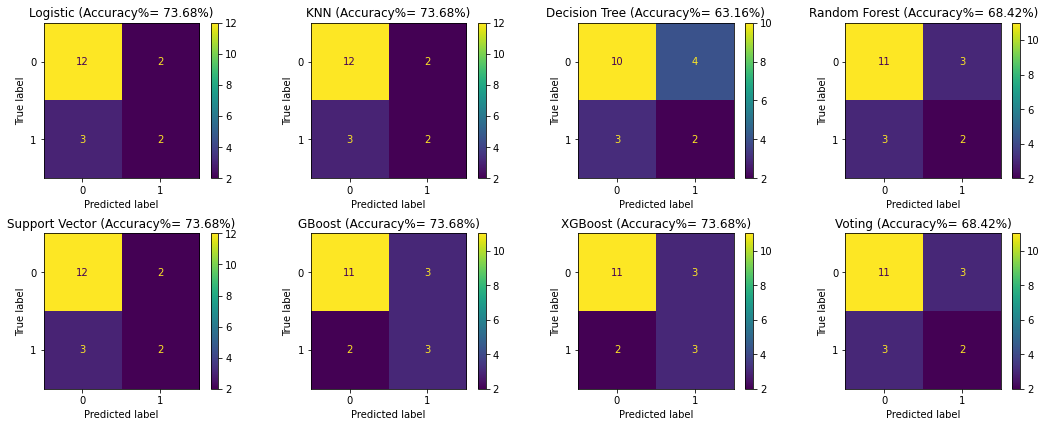

In [20]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

## Feature importance for 2 classidications: (Both Sarc. Classes) with age:

In [148]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited2sarcclasses.xlsx")
print(df)

    gender  age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0        1   64    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1        1   67    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2        0   56     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3        0   29     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4        1   82     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
..     ...  ...      ...     ...  ..  ...   ...      ...      ...      ...   
58       0   72     59.0     168  95  1.7  20.0  127.188   77.150   50.038   
59       1   72    124.0     182  73  2.4  37.4  225.685   78.253  147.431   
60       1   36     95.0     184  74  2.2  28.1  176.101   74.770  101.331   
61       0   52     78.0     170  71  1.9  27.0  186.885   70.471  116.414   
62       1   45     94.0     174  76  2.1  31.0  135.175   51.081   84.093   

    ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_

In [149]:
df = df.drop(['gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0   64  238.242  181.514   56.728  23.811     101.864      77.609   
1   67  262.539  181.558   80.981  30.845     118.614      82.027   
2   56   95.021   46.162   48.860  51.420      59.253      28.785   
3   29  320.154   67.640  252.514  78.873     186.564      39.416   
4   82  311.236  129.252  181.984  58.471     159.776      66.353   
5   61  157.995   87.447   70.548  44.652      73.060      40.437   
6   34  176.864  107.140   69.724  39.422      78.948      47.825   
7   69  130.226   46.267   83.959  64.472      83.430      29.641   
8   64  164.636   88.562   76.074  46.207      88.223      47.458   
9   25  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 38 columns]

In [150]:
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(1,0)
df['Cardiac Sarcoidosis'] = df['Cardiac Sarcoidosis'].replace(2,1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0   64  238.242  181.514   56.728  23.811     101.864      77.609   
1   67  262.539  181.558   80.981  30.845     118.614      82.027   
2   56   95.021   46.162   48.860  51.420      59.253      28.785   
3   29  320.154   67.640  252.514  78.873     186.564      39.416   
4   82  311.236  129.252  181.984  58.471     159.776      66.353   
5   61  157.995   87.447   70.548  44.652      73.060      40.437   
6   34  176.864  107.140   69.724  39.422      78.948      47.825   
7   69  130.226   46.267   83.959  64.472      83.430      29.641   
8   64  164.636   88.562   76.074  46.207      88.223      47.458   
9   25  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    1  
1                   -0.61                  0.59                    1  
2                    0.68                 -2.84                    0  
3                   -1.58                  1.92                    0  
4                    0.69                 -0.81                    1  
5                    1.58                 -2.48                    1  
6                    0.77                 -1.73                    0  
7                    0.63                 -0.73                    1  
8                    1.67                 -2.37                    1  
9                    0.63                 -2.27                    0  

[10 rows x 38 columns]

In [151]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :37].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 37].values


rf = RandomForestClassifier()
rf.fit(X, y)

# Get the feature importances and their corresponding names
importance = rf.feature_importances_
feature_names  = ['age','LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]


# Print the important features and their names
for i, feature in enumerate(zip(feature_names, importance), 1):
    print(f"Feature {i}: {feature[0]} ({feature[1]:.3f})")

# Print the names of the top two features
top_features = sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)[:5]
print(f"\nTop five features: {top_features[0][0]} and {top_features[1][0]} and {top_features[2][0]} and {top_features[3][0]} and {top_features[4][0]}")


Feature 1: age (0.030)
Feature 2: LV_EDV (0.026)
Feature 3: LV_ESV (0.063)
Feature 4: LV_SV (0.012)
Feature 5: LV_EF (0.011)
Feature 6: LV_EDV/BSA (0.047)
Feature 7: LV_ESV/BSA (0.026)
Feature 8: LV_radial_SAX_S (0.014)
Feature 9: LV_circumf_SAX_S (0.026)
Feature 10: LV_syst_radial_SAX_SR (0.027)
Feature 11: LV_syst_circumf_SAX_SR (0.025)
Feature 12: LV_diast_radial_SAX_SR (0.023)
Feature 13: LV_diast_circumf_SAX_SR (0.017)
Feature 14: LV_radial_LAX_S (0.037)
Feature 15: LV_time_to_peak_long_LAX (0.022)
Feature 16: LV_syst_radial_LAX_SR (0.048)
Feature 17: LV_syst_long_LAX_SR (0.013)
Feature 18: LV_diast_radial_LAX_SR (0.043)
Feature 19: LV_diast_long_LAX_SR (0.041)
Feature 20: RV_EDV (0.021)
Feature 21: RV_ESV (0.019)
Feature 22: RV_SV (0.024)
Feature 23: RV_EF (0.017)
Feature 24: RV_EDV/BSA (0.021)
Feature 25: RV_ESV/BSA (0.024)
Feature 26: LA_radial_LAX_S (0.017)
Feature 27: LA_long_LAX_S (0.029)
Feature 28: LA_syst_radial_LAX_SR (0.034)
Feature 29: LA_syst_long_LAX_SR (0.070)
Featu

In [152]:
# Print the feature importances
print(rf.feature_importances_)

[0.03024701 0.02557461 0.0634372  0.01230766 0.01053062 0.04708718
 0.02551929 0.01421031 0.02616129 0.02685041 0.0253101  0.02344147
 0.01666373 0.03667061 0.02175254 0.04773005 0.01306627 0.04278121
 0.04120909 0.02060977 0.01855375 0.02395181 0.01702704 0.02133289
 0.02378349 0.01697427 0.02923477 0.03360047 0.07024488 0.02503934
 0.01245597 0.00686381 0.0120662  0.01659588 0.02867241 0.027624
 0.04481859]


In [153]:
features = ['age','LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['age',
 'LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

### Drop non-important columns and retrain the data for Sarc(s): 

In [154]:
#drop all columns except points and blocks
df = df[['age','LA_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR' , 'LA_syst_radial_LAX_SR' , 'LV_radial_LAX_S' , 'LV_syst_radial_LAX_SR', 'Cardiac Sarcoidosis']]
df

age  LA_syst_long_LAX_SR  LV_diast_radial_LAX_SR  LA_syst_radial_LAX_SR  \
0    64                -0.44                   -0.46                   0.38   
1    67                 0.01                   -0.50                  -0.02   
2    56                 2.28                   -1.45                  -0.76   
3    29                 0.32                   -2.72                   0.33   
4    82                -0.51                   -0.48                   0.40   
..  ...                  ...                     ...                    ...   
58   72                 0.54                   -0.87                  -0.46   
59   72                 1.45                   -0.68                  -0.95   
60   36                 0.87                   -0.68                   0.70   
61   52                 1.59                   -1.51                  -0.90   
62   45                 1.16                   -1.33                  -0.99   

    LV_radial_LAX_S  LV_syst_radial_LAX_SR  Cardiac Sarcoidosis  
0             14.43                   0.45                    1  
1              9.86                   0.39                    1  
2             29.55                   1.41                    0  
3             29.70                   1.35                    0  
4              6.70                   0.44                    1  
..              ...                    ...                  ...  
58            10.88                   0.73                    0  
59            13.81                   0.67                    0  
60            14.20                   0.77                    0  
61            30.76                   1.51                    0  
62            25.21                   1.27                    0  

[63 rows x 7 columns]

In [155]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :6].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 6].values

In [156]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [157]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((44, 6), (44,))  
Test: ((19, 6), (19,))


In [159]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
X_train

array([[ 0.27818525, -0.01214961,  1.14224096, -0.24245692, -1.40273552,
        -1.02826851],
       [-1.89462261,  0.28378024,  0.39611021, -0.72300218, -1.00923093,
        -0.46250653],
       [ 0.85760068,  0.02603488, -1.36399311, -0.36259324,  1.28750568,
         1.21763513],
       [ 1.58186997, -1.35815315,  1.21876719,  0.99494711, -1.83725325,
        -1.09684572],
       [ 0.06090446,  1.22884656, -1.91880828,  2.00409215,  0.87515722,
         0.75473896],
       [-0.44608404,  1.34340005, -1.19180909, -1.55194275,  1.55907927,
         1.50908827],
       [-1.96704954,  0.10240388, -0.8665726 , -0.29051145,  0.12472735,
        -0.08533187],
       [ 0.42303911, -0.48945583,  1.86924015,  0.15399291, -2.24849326,
        -1.42258747],
       [ 0.49546604, -1.39633765,  1.16137252,  0.0338566 , -1.26639449,
        -1.06255712],
       [ 0.56789296,  0.19786512,  0.20479463, -0.1583615 ,  0.25995991,
         0.18897697],
       [-0.51851097,  0.42697211, -0.52220457, -0.

In [161]:
X_test

array([[-0.5909379 ,  0.64653297, -0.75178326, -0.56682497,  0.82971021,
         0.73759465],
       [-0.51851097, -0.12670311, -0.08217874, -0.1583615 , -0.2820788 ,
        -0.15390908],
       [ 0.27818525, -1.29133028,  1.25703031,  0.97091985, -0.98041088,
        -1.07970142],
       [-0.22880325, -0.47990971,  1.18050408,  0.00982933, -1.8572056 ,
        -0.75395967],
       [ 0.06090446,  0.2265035 , -0.48394145, -0.29051145,  0.15908972,
         0.48043012],
       [ 0.27818525, -0.51809421,  0.95092538,  0.08191112, -1.66322447,
        -1.18256723],
       [-1.6049149 ,  0.39833374,  0.03261061, -0.35057961,  0.11253425,
        -0.41107362],
       [-0.08394939, -0.17443373,  0.20479463, -0.09829335,  0.37634859,
         0.53186302],
       [-1.6049149 , -0.56582483,  0.43437332,  0.20204744,  0.00501328,
        -0.22248629],
       [-1.74976875, -0.04078799,  0.83613604,  1.35535605, -1.00590554,
        -0.53108374],
       [-1.67734183,  1.78252177, -1.86141361, -0.

In [162]:
#initiating the models
reg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
sv = SVC()
gb = GradientBoostingClassifier()
xgb = XGBClassifier(use_label_encoder = False)
vot = VotingClassifier([('reg', reg), ('knn', knn), ('dtree', dtree), ('rf', rf), ('sv', sv), ('gb', gb), ('xgb', xgb)])

In [163]:
#fitting the models on the base data
for model in reg, knn, dtree, rf, sv, gb, xgb, vot:
    model.fit(X_train, y_train)

In [164]:
#running predictions on the base data
reg_pred = reg.predict(X_test)
knn_pred = knn.predict(X_test)
dtree_pred = dtree.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb.predict(X_test)
vot_pred = vot.predict(X_test)

In [165]:
pred_df = pd.DataFrame({'Species': y_test,
                        'Regression': reg_pred,
                        'KNN': knn_pred,
                        'Decision Tree': dtree_pred,
                        'Random Forest': rf_pred,
                        'Supprt Vector': sv_pred,
                        'Gradient Boosting': gb_pred,
                        'XG Boosting': xgb_pred,
                        'Voting': vot_pred})
pred_df

Species  Regression  KNN  Decision Tree  Random Forest  Supprt Vector  \
0         0           0    0              0              0              0   
1         0           0    0              1              1              0   
2         1           1    1              1              1              1   
3         1           1    1              1              1              1   
4         1           0    0              0              0              0   
5         1           1    1              1              1              1   
6         0           0    0              1              0              0   
7         0           0    0              0              0              0   
8         0           0    1              1              1              1   
9         0           1    1              1              1              1   
10        0           0    0              0              0              0   
11        0           0    0              1              0              0   
12        0           0    1              0              0              0   
13        0           0    0              0              0              0   
14        0           0    0              0              0              0   
15        1           1    1              1              1              1   
16        0           0    0              0              0              0   
17        0           0    0              0              0              0   
18        0           0    0              0              0              0   

    Gradient Boosting  XG Boosting  Voting  
0                   0            0       0  
1                   1            1       0  
2                   1            1       1  
3                   1            1       1  
4                   0            0       0  
5                   1            1       1  
6                   0            1       0  
7                   1            0       0  
8                   1            1       1  
9                   1            1       1  
10                  0            0       0  
11                  0            0       0  
12                  0            1       0  
13                  0            0       0  
14                  0            0       0  
15                  1            1       1  
16                  0            0       0  
17                  0            0       0  
18                  0            0       0

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.80      0.80      0.80         5

    accuracy                           0.89        19
   macro avg       0.86      0.86      0.86        19
weighted avg       0.89      0.89      0.89        19

KNN
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.57      0.80      0.67         5

    accuracy                           0.79        19
   macro avg       0.74      0.79      0.76        19
weighted avg       0.83      0.79      0.80        19

Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.44      0.80      0.57         5

    accuracy                           0.68        19
   macro avg       0.67      0.72      0.66        19
weighted avg       0.78      0.68   

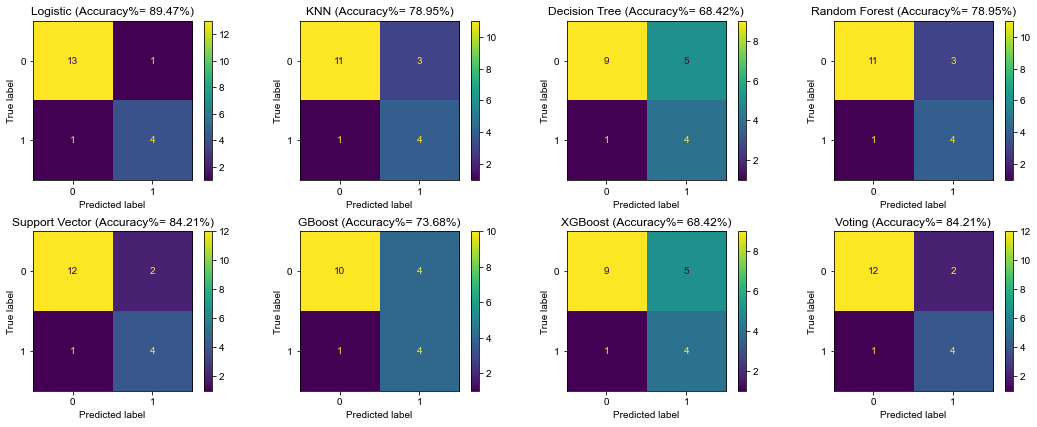

In [166]:
fig, ax = plt.subplots(2,4, figsize = (15, 6))

plot_confusion_matrix(reg, X_test, y_test, values_format= 'd', ax = ax[0][0])
ax[0][0].set_title(f'Logistic (Accuracy%={accuracy_score(y_test,reg_pred)*100: .2f}%)')
print("Logistic Regression")
print(classification_report(y_test, reg_pred))
# print(accuracy_score(y_test,reg_pred))



plot_confusion_matrix(knn, X_test, y_test, values_format= 'd', ax = ax[0][1])
ax[0][1].set_title(f'KNN (Accuracy%={accuracy_score(y_test,knn_pred)*100: .2f}%)')
print("KNN")
print(classification_report(y_test, knn_pred))



# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (R2={dtree.score(X_test, y_test)*100: .2f}%)')
plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
ax[0][2].set_title(f'Decision Tree (Accuracy%={accuracy_score(y_test,dtree_pred)*100: .2f}%)')
print("Decision Tree")
print(classification_report(y_test, dtree_pred))
# plot_confusion_matrix(dtree, X_test, y_test, values_format= 'd', ax = ax[0][2])
# ax[0][2].set_title(f'Decision Tree (ce_loss={log_loss(dtree_pred, y_test): .2f}%)')




plot_confusion_matrix(rf, X_test, y_test, values_format= 'd', ax = ax[0][3])
ax[0][3].set_title(f'Random Forest (Accuracy%={accuracy_score(y_test,rf_pred)*100: .2f}%)')
print("Random Forest")
print(classification_report(y_test, rf_pred))



plot_confusion_matrix(sv, X_test, y_test, values_format= 'd', ax = ax[1][0])
ax[1][0].set_title(f'Support Vector (Accuracy%={accuracy_score(y_test,sv_pred)*100: .2f}%)')
print("Support Vector Machine")
print(classification_report(y_test, sv_pred))



plot_confusion_matrix(gb, X_test, y_test, values_format= 'd',ax = ax[1][1])
ax[1][1].set_title(f'GBoost (Accuracy%={accuracy_score(y_test,gb_pred)*100: .2f}%)')
print("GBoost")
print(classification_report(y_test, gb_pred))



plot_confusion_matrix(xgb, X_test, y_test, values_format= 'd', ax = ax[1][2])
ax[1][2].set_title(f'XGBoost (Accuracy%={accuracy_score(y_test,xgb_pred)*100: .2f}%)')
print("XGBoost")
print(classification_report(y_test, xgb_pred))



plot_confusion_matrix(vot, X_test, y_test, values_format= 'd', ax = ax[1][3])
ax[1][3].set_title(f'Voting (Accuracy%={accuracy_score(y_test,vot_pred)*100: .2f}%)')
print("Voting")
print(classification_report(y_test, vot_pred))


plt.tight_layout()

* *Age has effect on classifying between both sarc. classes.*
* *Include age for this case for better results*

### SHAP for Logistic Regression:

In [167]:
df

age  LA_syst_long_LAX_SR  LV_diast_radial_LAX_SR  LA_syst_radial_LAX_SR  \
0    64                -0.44                   -0.46                   0.38   
1    67                 0.01                   -0.50                  -0.02   
2    56                 2.28                   -1.45                  -0.76   
3    29                 0.32                   -2.72                   0.33   
4    82                -0.51                   -0.48                   0.40   
..  ...                  ...                     ...                    ...   
58   72                 0.54                   -0.87                  -0.46   
59   72                 1.45                   -0.68                  -0.95   
60   36                 0.87                   -0.68                   0.70   
61   52                 1.59                   -1.51                  -0.90   
62   45                 1.16                   -1.33                  -0.99   

    LV_radial_LAX_S  LV_syst_radial_LAX_SR  Cardiac Sarcoidosis  
0             14.43                   0.45                    1  
1              9.86                   0.39                    1  
2             29.55                   1.41                    0  
3             29.70                   1.35                    0  
4              6.70                   0.44                    1  
..              ...                    ...                  ...  
58            10.88                   0.73                    0  
59            13.81                   0.67                    0  
60            14.20                   0.77                    0  
61            30.76                   1.51                    0  
62            25.21                   1.27                    0  

[63 rows x 7 columns]

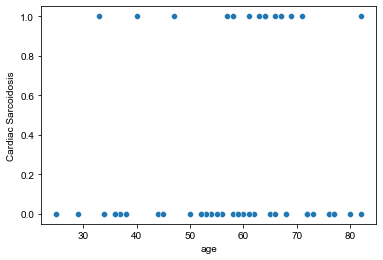

In [168]:
# # Create a scatter plot
import seaborn as sns
sns.scatterplot(x="age", y="Cardiac Sarcoidosis", data=df);

In [169]:
# Fits the explainer
explainer = shap.Explainer(reg.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [170]:
features = ['age','LA_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR' , 'LA_syst_radial_LAX_SR' , 'LV_radial_LAX_S' , 'LV_syst_radial_LAX_SR', 'Cardiac Sarcoidosis']
features

# features = ['age','LA_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR' , 'LA_syst_radial_LAX_SR' , 'LV_radial_LAX_S', 'Cardiac Sarcoidosis']
# features

['age',
 'LA_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LA_syst_radial_LAX_SR',
 'LV_radial_LAX_S',
 'LV_syst_radial_LAX_SR',
 'Cardiac Sarcoidosis']

In [171]:
feature_names

['age',
 'LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

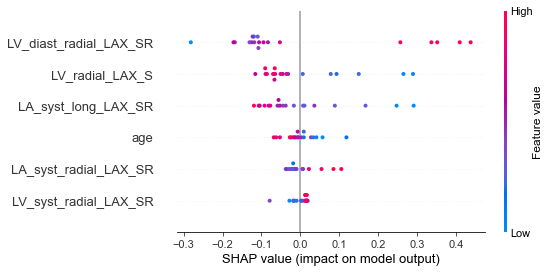

In [172]:
# to understand the importance or contribution of the features for the whole dataset, another plot can be used, the bee swarm plot:

# shap.summary_plot(shap_values, X_test, feature_names=features)
shap.summary_plot(shap_values, X_test, feature_names=features)

# or 
# shap.plots.beeswarm(shap_values)

### Positive SHAP value means positive impact on prediction, leading the model to predict 1(e.g. The patient has Sarc.). Negative SHAP value means negative impact, leading the model to predict 0 (e.g. the volunteer is healthy).

In [173]:

# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,8))

# #SHAP scatter plots
# shap.plots.scatter(shap_values[:,"LV_EDV/BSA"],ax=ax[0],show=False)
# shap.plots.scatter(shap_values[:,"age"],ax=ax[1])

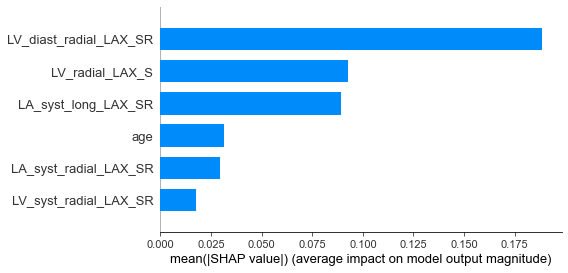

In [174]:
shap.summary_plot(shap_values, X, plot_type="bar",feature_names=features)


### GAM Interpretability (NOT Working):

In [176]:
#!/usr/bin/env python
# coding: utf-8

# ## Explain Your Model with Microsoft's InterpretML
# !pip install -U interpret

# In[3]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split


# In[4]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

# ## (A) Explore the data

# In[22]:
from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)


# ## (B) Train the Explainable Boosting Machine (EBM)

# In[23]:
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

lr = LinearRegression(random_state=seed)
lr.fit(X_train, y_train)

rt = RegressionTree(random_state=seed)
rt.fit(X_train, y_train)

ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(X_train, y_train)  
# For Classifier, use ebm = ExplainableBoostingClassifier()


# ## (C) How Does the EBM Model Perform?

# In[35]:
from interpret import show
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
lr_perf = RegressionPerf(lr.predict).explain_perf(X_test, y_test, name='Linear Regression')
rt_perf = RegressionPerf(rt.predict).explain_perf(X_test, y_test, name='Regression Tree')
show(ebm_perf)
show(lr_perf)
show(rt_perf)


# ## (D) Global Interpretability - What the Model Says for All Data

# In[24]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)


# ## (E) Local Interpretability - What the Model Says for Individual Data

# In[25]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)


# ## (F) Put All in a Dashboard - This is the Best

# In[36]:
show([marginal, lr_global, lr_perf, rt_global, rt_perf, ebm_perf, ebm_global, ebm_local])

ImportError: cannot import name 'NotRequired' from 'typing_extensions' (/Users/negin/opt/anaconda3/lib/python3.8/site-packages/typing_extensions.py)

### ROC Curve:

In [114]:
from sklearn import metrics

auc_roc_reg=metrics.roc_auc_score(y_test,reg_pred)

auc_roc_knn=metrics.roc_auc_score(y_test,knn_pred)


In [115]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_reg, true_positive_rate_reg, thresholds = roc_curve(y_test,reg_pred)
roc_auc_reg = auc(false_positive_rate_reg, true_positive_rate_reg)

false_positive_rate_knn, true_positive_rate_knn, thresholds = roc_curve(y_test,knn_pred)
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)

false_positive_rate_dtree, true_positive_rate_dtree, thresholds = roc_curve(y_test,dtree_pred)
roc_auc_dtree = auc(false_positive_rate_dtree, true_positive_rate_dtree)

false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test,rf_pred)
roc_auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)

false_positive_rate_svm, true_positive_rate_svm, thresholds = roc_curve(y_test,sv_pred)
roc_auc_svm = auc(false_positive_rate_svm, true_positive_rate_svm)

false_positive_rate_gb, true_positive_rate_gb, thresholds = roc_curve(y_test,gb_pred)
roc_auc_gb = auc(false_positive_rate_gb, true_positive_rate_gb)

false_positive_rate_xgb, true_positive_rate_xgb, thresholds = roc_curve(y_test,xgb_pred)
roc_auc_xgb = auc(false_positive_rate_xgb, true_positive_rate_xgb)

false_positive_rate_vt, true_positive_rate_vt, thresholds = roc_curve(y_test,vot_pred)
roc_auc_vt = auc(false_positive_rate_vt, true_positive_rate_vt)


Text(0.5, 0, 'False Positive Rate')

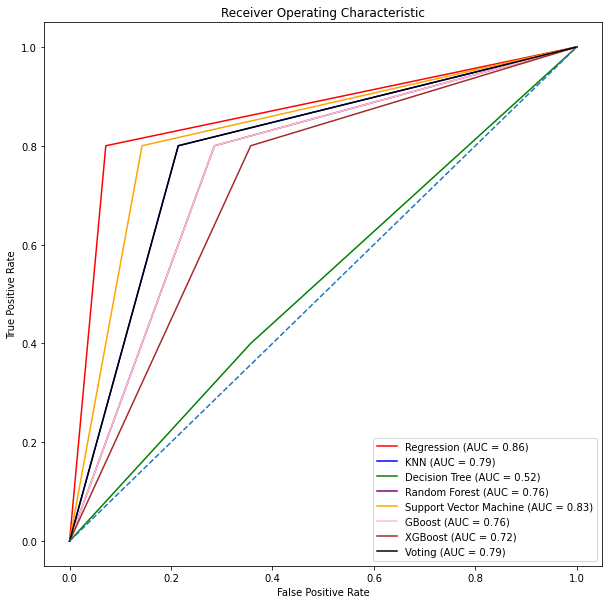

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_reg,true_positive_rate_reg, color='red',label = 'Regression (AUC = %0.2f)' % roc_auc_reg)
plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='blue',label = 'KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(false_positive_rate_dtree,true_positive_rate_dtree, color='green',label = 'Decision Tree (AUC = %0.2f)' % roc_auc_dtree)
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='purple',label = 'Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(false_positive_rate_svm,true_positive_rate_svm, color='orange',label = 'Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot(false_positive_rate_gb,true_positive_rate_gb, color='pink',label = 'GBoost (AUC = %0.2f)' % roc_auc_gb)
plt.plot(false_positive_rate_xgb,true_positive_rate_xgb, color='brown',label = 'XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(false_positive_rate_vt,true_positive_rate_vt, color='black',label = 'Voting (AUC = %0.2f)' % roc_auc_vt)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### XAI: LIME:

In [118]:
# Install the lime library if you haven't already
# pip install lime

import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your feature matrix X and target variable y
# X.shape = (107, 37)

feature_names = ['age','LA_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR' , 'LA_syst_radial_LAX_SR' , 'LV_radial_LAX_S' , 'LV_syst_radial_LAX_SR', 'Cardiac Sarcoidosis']

# Train a RandomForestClassifier (you can replace this with your own model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a LIME explainer for multi-class classification
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=[str(cls) for cls in range(3)], discretize_continuous=True)

# Choose an instance from the test set to explain
instance_idx = 10
instance = X_test[instance_idx]
true_class = y_test[instance_idx]

# Ensure the instance is a 2D array
instance = instance.reshape(1, -1)

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(instance.flatten(), model.predict_proba, num_features=X_train.shape[1], top_labels=3, num_samples=1000)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)


### XAI: ANCHORS 

In [17]:
# Install the alibi library if you haven't already
# pip install alibi

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from alibi.explainers import AnchorTabular

# Assuming you have your feature matrix X and target variable y
# X.shape = (107, 37)

# Train a RandomForestClassifier (you can replace this with your own model)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# Choose an instance from the test set to explain
instance_idx = 10
instance = X_test[instance_idx]
true_class = y_test[instance_idx]

# Initialize the AnchorTabular explainer
explainer = AnchorTabular(predictor=model.predict_proba, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# Fit the explainer to your training data
explainer.fit(X_train)

# Explain the prediction for the chosen instance
explanation = explainer.explain(instance)

# Display the anchor explanation
if 'feature' in explanation.meta:
    feature_indices = explanation.meta['feature']
    anchor_features = [f'feature_{idx}' for idx in feature_indices]
    print('Anchor Features:', anchor_features)
else:
    print('Unable to retrieve anchor features')

# Additional information
print('Precision:', explanation.precision)
print('Coverage:', explanation.coverage)


Unable to retrieve anchor features
Precision: 0.9584500466853408
Coverage: 0.1493


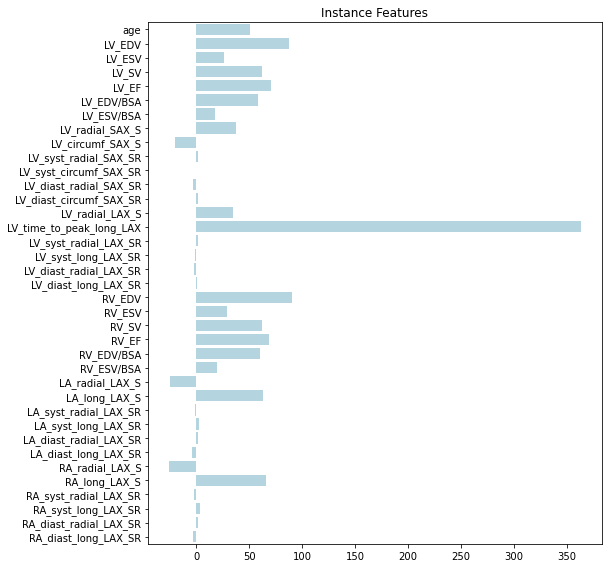

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your training data and has shape (n_samples, n_features)
# Replace this with your actual feature names and indices
feature_names = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA', 'LV_ESV/BSA', 'LV_radial_SAX_S',
                 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR', 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR',
                 'LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR',
                 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV',
                 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR',
                 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S',
                 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR',
                 'RA_diast_long_LAX_SR']

instance_idx = 10
instance = X_test[instance_idx]
anchor_indices = explanation.meta.get('feature', [])

# Plot the distribution of features for the chosen instance
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=instance, y=feature_names, color='lightblue')
plt.title('Instance Features')

# Check if anchor_indices is not empty before plotting
if anchor_indices:
    # Plot the features that form the anchor
    plt.subplot(1, 2, 2)
    sns.barplot(x=instance[anchor_indices], y=[feature_names[i] for i in anchor_indices], color='salmon')
    plt.title('Anchor Features')

plt.tight_layout()
plt.show()


# 3 classifications (with age) XAI:

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited3classes.xlsx")
print(df)

     gender        age  Gewicht  Height  HR       BSA        BMI   LV_EDV  \
0         1  64.000000    108.0     192  87  2.400000  29.400000  238.242   
1         1  67.000000    103.0     175  57  2.200000  33.600000  262.539   
2         0  56.000000     56.0     164  75  1.600000  20.800000   95.021   
3         0  29.000000     65.0     165  68  1.700000  23.900000  320.154   
4         1  82.000000     80.0     174  70  1.900000  26.400000  311.236   
..      ...        ...      ...     ...  ..       ...        ...      ...   
102       0  62.893151     58.0     156  74  1.569779  23.833005   86.800   
103       0  54.230137     67.0     165  55  1.738297  24.609734  128.600   
104       1  66.230137     83.0     176  63  1.995130  26.794938  165.200   
105       1  52.545205     75.0     178  76  1.926734  23.671254  125.300   
106       1  53.358904     82.0     178  53  2.001206  25.880571  144.900   

      LV_ESV    LV_SV  ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  \


In [3]:
df.head(10)

gender   age  Gewicht  Height  HR  BSA   BMI   LV_EDV   LV_ESV    LV_SV  \
0       1  64.0    108.0     192  87  2.4  29.4  238.242  181.514   56.728   
1       1  67.0    103.0     175  57  2.2  33.6  262.539  181.558   80.981   
2       0  56.0     56.0     164  75  1.6  20.8   95.021   46.162   48.860   
3       0  29.0     65.0     165  68  1.7  23.9  320.154   67.640  252.514   
4       1  82.0     80.0     174  70  1.9  26.4  311.236  129.252  181.984   
5       1  61.0     97.0     185  70  2.2  28.3  157.995   87.447   70.548   
6       1  34.0    102.0     183  79  2.2  30.5  176.864  107.140   69.724   
7       0  69.0     55.0     158  60  1.5  22.0  130.226   46.267   83.959   
8       0  64.0     80.0     164  73  1.8  29.7  164.636   88.562   76.074   
9       0  25.0     82.0     170  73  1.9  82.7  151.861   62.639   89.221   

   ...  LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0  ...                -0.44                    0.14                 -0.15   
1  ...                 0.01                    0.31                 -0.40   
2  ...                 2.28                    1.21                 -2.41   
3  ...                 0.32                    0.77                  0.90   
4  ...                -0.51                    0.04                 -0.05   
5  ...                 1.15                    1.78                 -2.18   
6  ...                 1.21                    1.16                 -2.37   
7  ...                -0.11                    0.55                 -0.65   
8  ...                 0.90                    1.16                 -1.31   
9  ...                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 44 columns]

In [4]:
df = df.drop(['gender', 'Gewicht', 'Height', 'HR', 'BSA', 'BMI'], axis=1)
df.head(10)

age   LV_EDV   LV_ESV    LV_SV   LV_EF  LV_EDV/BSA  LV_ESV/BSA  \
0  64.0  238.242  181.514   56.728  23.811     101.864      77.609   
1  67.0  262.539  181.558   80.981  30.845     118.614      82.027   
2  56.0   95.021   46.162   48.860  51.420      59.253      28.785   
3  29.0  320.154   67.640  252.514  78.873     186.564      39.416   
4  82.0  311.236  129.252  181.984  58.471     159.776      66.353   
5  61.0  157.995   87.447   70.548  44.652      73.060      40.437   
6  34.0  176.864  107.140   69.724  39.422      78.948      47.825   
7  69.0  130.226   46.267   83.959  64.472      83.430      29.641   
8  64.0  164.636   88.562   76.074  46.207      88.223      47.458   
9  25.0  151.861   62.639   89.221  58.752      78.868      32.531   

   LV_radial_SAX_S  LV_circumf_SAX_S  LV_syst_radial_SAX_SR  ...  \
0            18.41             -9.11                   0.58  ...   
1             9.31             -7.14                   0.54  ...   
2            22.81            -15.05                   1.14  ...   
3            32.98            -18.86                   1.78  ...   
4            13.19             -9.41                   0.59  ...   
5            23.17            -15.37                   1.19  ...   
6            15.59            -11.24                   0.90  ...   
7            25.78            -16.03                   0.97  ...   
8            17.70            -12.49                   0.71  ...   
9            23.92            -15.54                   1.30  ...   

   LA_syst_long_LAX_SR  LA_diast_radial_LAX_SR  LA_diast_long_LAX_SR  \
0                -0.44                    0.14                 -0.15   
1                 0.01                    0.31                 -0.40   
2                 2.28                    1.21                 -2.41   
3                 0.32                    0.77                  0.90   
4                -0.51                    0.04                 -0.05   
5                 1.15                    1.78                 -2.18   
6                 1.21                    1.16                 -2.37   
7                -0.11                    0.55                 -0.65   
8                 0.90                    1.16                 -1.31   
9                 1.36                    1.27                 -2.16   

   RA_radial_LAX_S  RA_long_LAX_S  RA_syst_radial_LAX_SR  RA_syst_long_LAX_SR  \
0            25.70         -12.31                   2.14                -0.87   
1            -2.81           4.20                  -0.51                 0.62   
2           -13.51          48.95                   1.08                 2.97   
3            29.35          19.10                   3.81                -1.25   
4            -6.48           9.12                  -0.83                 1.08   
5           -16.62          40.38                  -1.45                 2.16   
6            -6.08          32.85                  -1.30                 2.20   
7           -19.59          57.38                  -1.33                 2.78   
8           -21.26          44.11                  -1.46                 1.75   
9            -5.04          34.51                   1.25                 2.16   

   RA_diast_radial_LAX_SR  RA_diast_long_LAX_SR  Cardiac Sarcoidosis  
0                   -1.02                  0.69                    2  
1                   -0.61                  0.59                    2  
2                    0.68                 -2.84                    1  
3                   -1.58                  1.92                    1  
4                    0.69                 -0.81                    2  
5                    1.58                 -2.48                    2  
6                    0.77                 -1.73                    1  
7                    0.63                 -0.73                    2  
8                    1.67                 -2.37                    2  
9                    0.63                 -2.27                    1  

[10 rows x 38 col

In [5]:
features = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]
features

['age',
 'LV_EDV',
 'LV_ESV',
 'LV_SV',
 'LV_EF',
 'LV_EDV/BSA',
 'LV_ESV/BSA',
 'LV_radial_SAX_S',
 'LV_circumf_SAX_S',
 'LV_syst_radial_SAX_SR',
 'LV_syst_circumf_SAX_SR',
 'LV_diast_radial_SAX_SR',
 'LV_diast_circumf_SAX_SR',
 'LV_radial_LAX_S',
 'LV_time_to_peak_long_LAX',
 'LV_syst_radial_LAX_SR',
 'LV_syst_long_LAX_SR',
 'LV_diast_radial_LAX_SR',
 'LV_diast_long_LAX_SR',
 'RV_EDV',
 'RV_ESV',
 'RV_SV',
 'RV_EF',
 'RV_EDV/BSA',
 'RV_ESV/BSA',
 'LA_radial_LAX_S',
 'LA_long_LAX_S',
 'LA_syst_radial_LAX_SR',
 'LA_syst_long_LAX_SR',
 'LA_diast_radial_LAX_SR',
 'LA_diast_long_LAX_SR',
 'RA_radial_LAX_S',
 'RA_long_LAX_S',
 'RA_syst_radial_LAX_SR',
 'RA_syst_long_LAX_SR',
 'RA_diast_radial_LAX_SR',
 'RA_diast_long_LAX_SR']

In [6]:
# #heatmap on base data
# df_corr = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr

In [7]:
# #Let's see if we have any outliers in the base data
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 6))
# index = 0
# axs = axs.flatten()
# for col_name, series_value in df.items():
#     sns.boxplot(y=col_name, data=df, ax=axs[index])
#     index += 1
# plt.tight_layout()

In [8]:
# #counting the outliers
# for col_name, series_value in df.items():
#     q1 = series_value.quantile(0.25)
#     q3 = series_value.quantile(0.75)
#     inter_quartile_range = q3 - q1
#     outlier_cut = series_value[(series_value <= q1 - 1.5 * inter_quartile_range) | (series_value >= q3 + 1.5 * inter_quartile_range)]
#     percent_value = np.shape(outlier_cut)[0] / np.shape(df)[0] * 100
#     print("Outliers in column %s = %.2f%%" % (col_name, percent_value))

In [9]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)
df_norm

array([[ 0.55506493,  1.80413317,  2.98565448, ..., -2.79463135,
         1.95355283,  1.72306393],
       [ 0.81241201,  2.30417054,  2.98676665, ..., -2.3337273 ,
         1.89704292,  1.72306393],
       [-0.13119397, -1.14338513, -0.43556625, ..., -0.88356578,
        -0.04124695,  0.33683957],
       ...,
       [ 0.74637135,  0.30091345, -0.04787576, ...,  0.79142699,
        -0.38030641, -1.0493848 ],
       [-0.4275544 , -0.52023694, -0.39669104, ...,  0.83639324,
         0.14523575, -1.0493848 ],
       [-0.35775341, -0.11686482, -0.27030869, ...,  0.79142699,
        -0.38030641, -1.0493848 ]])

In [10]:
# df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
# df_corr_norm

In [11]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :37].values    # with other features like age, HR, BMI, etc > X = df.iloc[:, :43].values 
y = df.iloc[:, 37].values

In [12]:
X.shape

(107, 37)

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X

array([[ 64.        , 238.242     , 181.514     , ...,  -0.87      ,
         -1.02      ,   0.69      ],
       [ 67.        , 262.539     , 181.558     , ...,   0.62      ,
         -0.61      ,   0.59      ],
       [ 56.        ,  95.021     ,  46.162     , ...,   2.97      ,
          0.68      ,  -2.84      ],
       ...,
       [ 66.23013699, 165.2       ,  61.5       , ...,   2.05      ,
          2.17      ,  -3.44      ],
       [ 52.54520548, 125.3       ,  47.7       , ...,   2.72      ,
          2.21      ,  -2.51      ],
       [ 53.35890411, 144.9       ,  52.7       , ...,   2.05      ,
          2.17      ,  -3.44      ]])

In [15]:
y

array([2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 37), (74,))  
Test: ((33, 37), (33,))


In [17]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 1.21334039, -1.12142601, -0.39854187, ...,  0.10189828,
         1.42382968, -1.05091934],
       [-0.30625419, -0.33813305, -0.53783658, ..., -0.58675578,
        -0.20066568,  0.76227931],
       [ 0.78201851,  0.18185501,  0.03023419, ..., -0.38421047,
         0.66878254, -0.15898991],
       ...,
       [ 0.14758367, -0.44781804, -0.74910256, ..., -0.15851712,
        -0.15490525,  0.22242728],
       [ 0.7853021 , -0.78662276, -0.46490286, ...,  0.76161729,
         0.97766546, -0.95116408],
       [ 0.43372434, -1.3293603 , -1.00262175, ...,  0.08453725,
         0.26837875, -0.09444239]])

In [19]:
X_test

array([[-0.06842908, -0.64484476, -0.86177776, ..., -0.07171199,
        -0.55530904, -0.34676453],
       [-0.15638215, -0.77079969, -0.11659567, ...,  3.21530908,
        -0.15490525, -1.03331547],
       [ 2.06941698,  3.22939131,  1.48919016, ..., -0.96291136,
        -0.90995239,  1.17303628],
       ...,
       [-0.58676586, -1.30701706, -0.93924195, ...,  0.29865658,
         0.62302211, -0.26461313],
       [-0.23260815, -0.92921324, -0.86647256, ...,  0.40282274,
         1.06918633, -0.35263248],
       [-2.81021957, -0.00783907, -0.07448332, ..., -0.3379144 ,
        -0.97859304,  0.31631459]])

## XAI: LIME

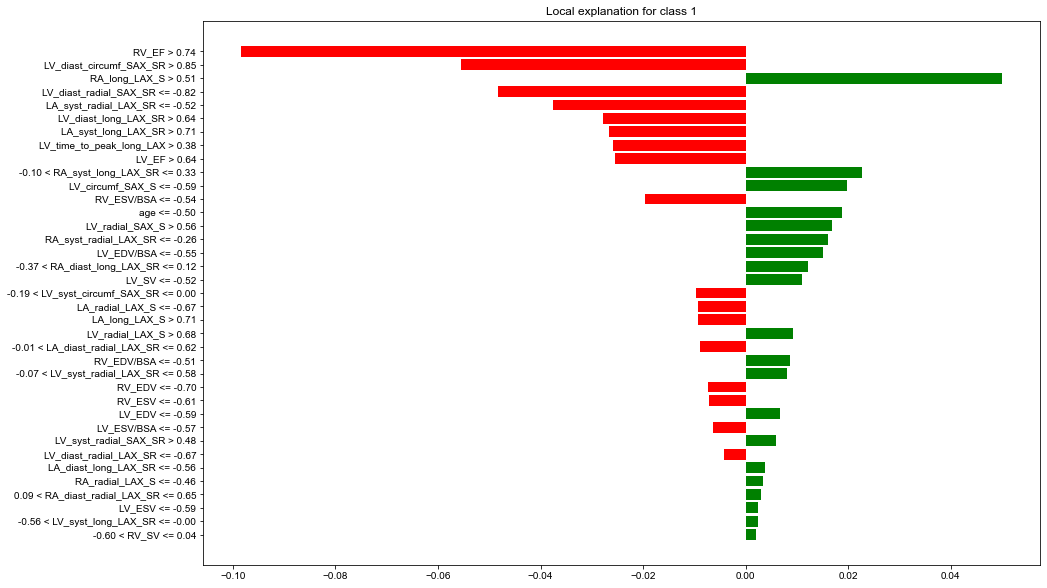

In [145]:
# Install the lime library if you haven't already
# pip install lime

import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your feature matrix X and target variable y
# X.shape = (107, 37)

feature_names = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA' , 'LV_ESV/BSA', 'LV_radial_SAX_S', 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR' , 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR','LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR', 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV', 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR', 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S', 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR', 'RA_diast_long_LAX_SR'
       ]

# Train a RandomForestClassifier (you can replace this with your own model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a LIME explainer for multi-class classification
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=[str(cls) for cls in range(3)], discretize_continuous=True)

# Choose an instance from the test set to explain
instance_idx = 30
instance = X_test[instance_idx]
true_class = y_test[instance_idx]

# Ensure the instance is a 2D array
instance = instance.reshape(1, -1)

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(instance.flatten(), model.predict_proba, num_features=X_train.shape[1], top_labels=3, num_samples=1000)

fig = explanation.as_pyplot_figure()
fig.set_size_inches(15, 10)  # Adjust the size as needed
plt.rcParams["font.family"] = "Arial"  # Set font family to Arial
fig.savefig('/Users/negin/Desktop/UVA/Dissertation/Dissertation Book/explanation_plot.png', format='png', bbox_inches='tight')


# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)



## XAI: DALEX

In [30]:
import dalex as dx

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [33]:


# Train a model (Random Forest Classifier in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a Dalex explainer
expl = dx.Explainer(model, X_train, y_train)

# Calculate Shapley values for a specific observation in the test set
observation_index = 0  # Replace with the index of the observation you want to explain
shap_values = expl.predict_parts(X_test[observation_index, :])

# Plot the Shapley values
dx.plot.plot_shap(values=shap_values, feature_names=X_train.columns)

Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataFrame. Columns are set as string numbers.
  -> data              : 74 rows 37 cols
  -> target variable   : 74 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f8ef0d508b0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.02, mean = 0.446, max = 0.98
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.19, mean = 0.297, max = 1.84
  -> model_info        : package sklearn

A new explainer has been created!


AttributeError: module 'dalex' has no attribute 'plot'

## XAI - Anchors:

In [20]:
# Install the alibi library if you haven't already
# pip install alibi

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from alibi.explainers import AnchorTabular

# Assuming you have your feature matrix X and target variable y
# X.shape = (107, 37)

# Train a RandomForestClassifier (you can replace this with your own model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Choose an instance from the test set to explain
instance_idx = 30
instance = X_test[instance_idx]
true_class = y_test[instance_idx]

# Initialize the AnchorTabular explainer
explainer = AnchorTabular(predictor=model.predict_proba, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# Fit the explainer to your training data
explainer.fit(X_train)

# Explain the prediction for the chosen instance
explanation = explainer.explain(instance)

# Display the anchor explanation
if 'feature' in explanation.meta:
    feature_indices = explanation.meta['feature']
    anchor_features = [f'feature_{idx}' for idx in feature_indices]
    print('Anchor Features:', anchor_features)
else:
    print('Unable to retrieve anchor features')

# Additional information
print('Precision:', explanation.precision)
print('Coverage:', explanation.coverage)


2024-01-24 18:46:53,735	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-24 18:47:00.941284: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Unable to retrieve anchor features
Precision: 1.0
Coverage: 0.0393


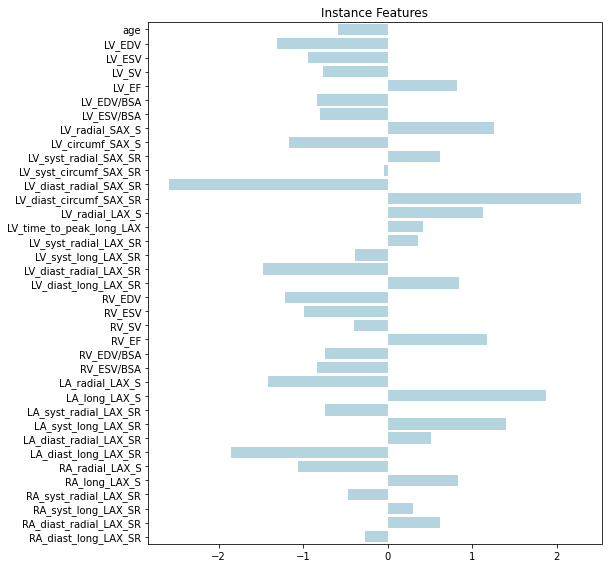

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your training data and has shape (n_samples, n_features)
# Replace this with your actual feature names and indices
feature_names = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA', 'LV_ESV/BSA', 'LV_radial_SAX_S',
                 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR', 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR',
                 'LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR',
                 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV',
                 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR',
                 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S',
                 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR',
                 'RA_diast_long_LAX_SR']

instance_idx = 30
instance = X_test[instance_idx]
anchor_indices = explanation.meta.get('feature', [])

# Plot the distribution of features for the chosen instance
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=instance, y=feature_names, color='lightblue')
plt.title('Instance Features')

# Check if anchor_indices is not empty before plotting
if anchor_indices:
    # Plot the features that form the anchor
    plt.subplot(1, 2, 2)
    sns.barplot(x=instance[anchor_indices], y=[feature_names[i] for i in anchor_indices], color='salmon')
    plt.title('Anchor Features')

plt.tight_layout()
plt.show()


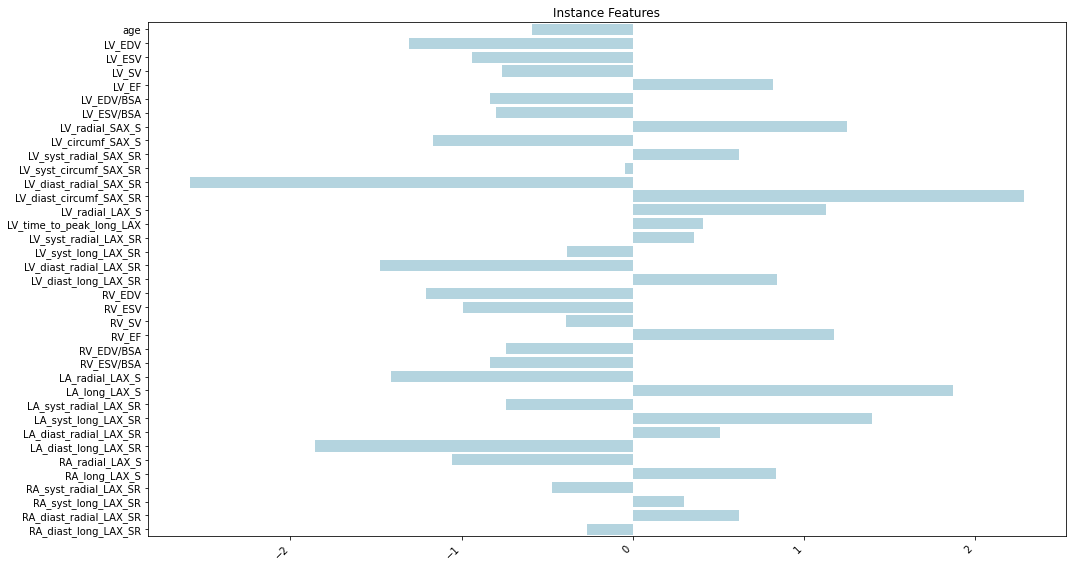

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is your training data and has shape (n_samples, n_features)
# Replace this with your actual feature names and indices
feature_names = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA', 'LV_ESV/BSA', 'LV_radial_SAX_S',
                 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR', 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR',
                 'LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR',
                 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV',
                 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR',
                 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S',
                 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR',
                 'RA_diast_long_LAX_SR']

instance_idx = 30
instance = X_test[instance_idx]

# Plot the distribution of features for the chosen instance
plt.figure(figsize=(15, 8))
sns.barplot(x=instance, y=feature_names, color='lightblue')
plt.title('Instance Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
# Install the alibi library if you haven't already
# pip install alibi

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from alibi.explainers import AnchorTabular

# Assuming you have your feature matrix X and target variable y
# X.shape = (107, 37)

# Train a RandomForestClassifier (you can replace this with your own model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Choose an instance from the test set to explain
instance_idx = 30
instance = X_test[instance_idx]
true_class = y_test[instance_idx]

# Ensure feature_names matches the column names of your training data
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Initialize the AnchorTabular explainer with feature_names
explainer = AnchorTabular(predictor=model.predict_proba, feature_names=feature_names)

# Fit the explainer to your training data
explainer.fit(X_train)

# Explain the prediction for the chosen instance
explanation = explainer.explain(instance)

# Print intermediate results
print('Raw Explanation:', explanation.raw['feature'])
print('Perturbed Instances:', explanation.raw['examples'])

# Display the anchor explanation
if 'feature' in explanation.meta:
    feature_indices = explanation.meta['feature']
    anchor_features = [feature_names[idx] for idx in feature_indices]
    print('Anchor Features:', anchor_features)
else:
    print('Unable to retrieve anchor features')

# Additional information
print('Precision:', explanation.precision)
print('Coverage:', explanation.coverage)


Raw Explanation: [5, 27, 19]
Perturbed Instances: [{'covered_true': array([[ 8.85920412e-01, -1.48779417e+00, -9.04030956e-01,
        -1.09221482e+00,  4.59374343e-01, -9.94302444e-01,
        -8.32679585e-01,  7.83989802e-01, -8.71487000e-01,
         1.16241574e+00, -5.92526096e-01, -1.18148942e+00,
         9.04211383e-01,  1.47449051e-01,  1.00246657e+00,
        -2.83299818e-01,  3.03217704e-01, -1.44725114e+00,
         5.33798865e-01, -1.31402874e+00, -8.53045213e-01,
        -8.53264198e-01,  5.25535119e-01, -1.12528778e+00,
        -7.39679073e-01,  6.17768322e-02, -2.01618163e-01,
        -4.12108077e-01,  1.77304506e-01, -1.43014396e-01,
        -1.42335957e-01, -4.52047237e-01, -2.92967914e-02,
         2.36015725e-01, -3.32127390e-01,  2.68378754e-01,
         1.69615670e-01],
       [ 2.77329513e-02, -1.51262343e-01, -2.39716792e-01,
         8.47069855e-02,  1.93862487e-01, -5.57108967e-01,
        -2.13430587e-01, -1.91514352e-01,  4.90608498e-02,
        -1.07390112e-

In [26]:
# Assuming X_test is your test dataset
anchor_feature_indices = [5, 27, 19]
anchor_features = X_test[instance_idx, anchor_feature_indices]

# Assuming feature_names is a list of your feature names
feature_names = [f'feature_{i}' for i in range(X_test.shape[1])]

# Extract feature names and values
anchor_feature_names = [feature_names[idx] for idx in anchor_feature_indices]
anchor_feature_values = anchor_features.tolist()

# Display feature names and values
for name, value in zip(anchor_feature_names, anchor_feature_values):
    print(f'{name}: {value}')


feature_5: -0.8329639352785504
feature_27: -0.7391429048731144
feature_19: -1.207396812241582


In [27]:
# Provided feature names
feature_names = ['age', 'LV_EDV', 'LV_ESV', 'LV_SV', 'LV_EF', 'LV_EDV/BSA', 'LV_ESV/BSA', 'LV_radial_SAX_S',
                 'LV_circumf_SAX_S', 'LV_syst_radial_SAX_SR', 'LV_syst_circumf_SAX_SR', 'LV_diast_radial_SAX_SR',
                 'LV_diast_circumf_SAX_SR', 'LV_radial_LAX_S', 'LV_time_to_peak_long_LAX', 'LV_syst_radial_LAX_SR',
                 'LV_syst_long_LAX_SR', 'LV_diast_radial_LAX_SR', 'LV_diast_long_LAX_SR', 'RV_EDV', 'RV_ESV', 'RV_SV',
                 'RV_EF', 'RV_EDV/BSA', 'RV_ESV/BSA', 'LA_radial_LAX_S', 'LA_long_LAX_S', 'LA_syst_radial_LAX_SR',
                 'LA_syst_long_LAX_SR', 'LA_diast_radial_LAX_SR', 'LA_diast_long_LAX_SR', 'RA_radial_LAX_S',
                 'RA_long_LAX_S', 'RA_syst_radial_LAX_SR', 'RA_syst_long_LAX_SR', 'RA_diast_radial_LAX_SR',
                 'RA_diast_long_LAX_SR']

# Indices to map
indices = [5, 27, 19]

# Map indices to feature names
selected_features = [feature_names[idx] for idx in indices]

# Print the result
print(selected_features)


['LV_EDV/BSA', 'LA_syst_radial_LAX_SR', 'RV_EDV']


## Below are extra and not importnant 

In [14]:
!pip install anchor-exp


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: tensorflow-examples 3378631ec6e02e49fbbb87e4756b230c4106b9e4- has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of tensorflow-examples or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from anchor import anchor_tabular

# Load data from Excel file
df = pd.read_excel("/Users/negin/Desktop/UVA/Papers and conferences/Misagh_paper2/SVM_no_units_edited3classes.xlsx")

# Assuming the target variable is in the last column
target_column_index = df.shape[1] - 1

# Split the dataset into features and target
X = df.iloc[:, :target_column_index].values
y = df.iloc[:, target_column_index].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Support Vector Machine (SVM) Regressor
regressor = SVR()
regressor.fit(X_train, y_train)

# Use the anchor library to generate an anchor
explainer = anchor_tabular.AnchorTabularExplainer(class_names=["Class 0", "Class 1", "Class 2"], feature_names=df.columns[:-1], train_data=X_train)

# Choose a sample for explanation (sample index 30)
sample_idx = 30
sample_instance = X_test[sample_idx]

# Generate an anchor for the sample
anchor = explainer.explain_instance(sample_instance, regressor.predict)

# Print the anchor
print('Anchor:', anchor)


Anchor: <anchor.anchor_explanation.AnchorExplanation object at 0x7fcde2224c40>
